In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
from bs4 import BeautifulSoup
%matplotlib inline
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('reviews_rt.csv')
df

,Unnamed: 0,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT
0,0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood,once_upon_a_time_in_hollywood
1,1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light,angels_are_made_of_light
2,2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack,the_great_hack
3,3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie,rosie
4,4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man,a_faithful_man
5,5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank,point_blank
6,6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!",cassandro_the_exotico
7,7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th,bottom_of_the_9th
8,8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...,i_do_not_care_if_we_go_down_in_history_as_barb...
9,9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow,shes_just_a_shadow


In [38]:
info = doc.find(class_="content-meta info").find(text = 'Genre: ').\
    findNext('div').text.strip().split(',')
genre = []
for inf in info:
    inf = inf.strip()
    genre.append(inf)
genre

['Comedy', 'Drama']

In [58]:
def scrape_page(row):
    # These both work the same
    url = f"https://www.rottentomatoes.com/m/" + row['RT']
#     url = f"https://www.congress.gov/member/{row['slug']}"
    # Print out the 'slug' column
    print("Scraping", url)

    # Steal all of our scraping code from before
    response = requests.get(url)
    doc = BeautifulSoup(response.text)

    # find and print out his name
    # doc.find, not doc.find_all, because there is only ONE name
    reviews_rt = {}
    
    try:
        info = doc.find(class_="content-meta info").find(text = 'Genre: ').findNext('div').text.strip().split(',')
        genre = []
        for inf in info:
            inf = inf.strip()
            genre.append(inf)
    except:
        genre = ['None']
    
    reviews_rt['genre'] = genre

    return pd.Series(reviews_rt)

In [59]:
rt = df.apply(scrape_page, axis=1)
rt

Scraping https://www.rottentomatoes.com/m/once_upon_a_time_in_hollywood
Scraping https://www.rottentomatoes.com/m/once_upon_a_time_in_hollywood
Scraping https://www.rottentomatoes.com/m/angels_are_made_of_light
Scraping https://www.rottentomatoes.com/m/the_great_hack
Scraping https://www.rottentomatoes.com/m/rosie
Scraping https://www.rottentomatoes.com/m/a_faithful_man
Scraping https://www.rottentomatoes.com/m/point_blank
Scraping https://www.rottentomatoes.com/m/cassandro_the_exotico
Scraping https://www.rottentomatoes.com/m/bottom_of_the_9th
Scraping https://www.rottentomatoes.com/m/i_do_not_care_if_we_go_down_in_history_as_barbarians
Scraping https://www.rottentomatoes.com/m/shes_just_a_shadow
Scraping https://www.rottentomatoes.com/m/luz
Scraping https://www.rottentomatoes.com/m/tiny_the_life_of_erin_blackwell
Scraping https://www.rottentomatoes.com/m/david_crosby_remember_my_name
Scraping https://www.rottentomatoes.com/m/at_war
Scraping https://www.rottentomatoes.com/m/crawl
Scra

Scraping https://www.rottentomatoes.com/m/charlie_says
Scraping https://www.rottentomatoes.com/m/serengeti_rules
Scraping https://www.rottentomatoes.com/m/the_biggest_little_farm
Scraping https://www.rottentomatoes.com/m/pasolini
Scraping https://www.rottentomatoes.com/m/the_river_and_the_wall
Scraping https://www.rottentomatoes.com/m/all_is_true
Scraping https://www.rottentomatoes.com/m/the_hustle
Scraping https://www.rottentomatoes.com/m/poms
Scraping https://www.rottentomatoes.com/m/pokémon_detective_pikachu
Scraping https://www.rottentomatoes.com/m/david_cross_oh_come_on
Scraping https://www.rottentomatoes.com/m/tolkien
Scraping https://www.rottentomatoes.com/m/my_son
Scraping https://www.rottentomatoes.com/m/wine_country
Scraping https://www.rottentomatoes.com/m/the_silence_of_others
Scraping https://www.rottentomatoes.com/m/long_shot
Scraping https://www.rottentomatoes.com/m/meeting_gorbachev
Scraping https://www.rottentomatoes.com/m/hesburgh
Scraping https://www.rottentomatoes.c

Scraping https://www.rottentomatoes.com/m/the_house_that_jack_built
Scraping https://www.rottentomatoes.com/m/the_mule
Scraping https://www.rottentomatoes.com/m/martyr
Scraping https://www.rottentomatoes.com/m/mortal_engines
Scraping https://www.rottentomatoes.com/m/never-ending_man_hayao_miyazaki
Scraping https://www.rottentomatoes.com/m/that_way_madness_lies
Scraping https://www.rottentomatoes.com/m/bird_box
Scraping https://www.rottentomatoes.com/m/if_beale_street_could_talk
Scraping https://www.rottentomatoes.com/m/spider-man_into_the_spider-verse
Scraping https://www.rottentomatoes.com/m/the_world_is_yours
Scraping https://www.rottentomatoes.com/m/vox_lux
Scraping https://www.rottentomatoes.com/m/the_partys_just_beginning
Scraping https://www.rottentomatoes.com/m/divide_and_conquer_the_story_of_roger_ailes
Scraping https://www.rottentomatoes.com/m/mary_queen_of_scots
Scraping https://www.rottentomatoes.com/m/asher
Scraping https://www.rottentomatoes.com/m/bitter_melon
Scraping htt

Scraping https://www.rottentomatoes.com/m/classical_period
Scraping https://www.rottentomatoes.com/m/bad_times_at_the_el_royale
Scraping https://www.rottentomatoes.com/m/beautiful_boy
Scraping https://www.rottentomatoes.com/m/the_oath
Scraping https://www.rottentomatoes.com/m/bikini_moon
Scraping https://www.rottentomatoes.com/m/goosebumps_2_haunted_halloween
Scraping https://www.rottentomatoes.com/m/the_sentence
Scraping https://www.rottentomatoes.com/m/all_square
Scraping https://www.rottentomatoes.com/m/sadie
Scraping https://www.rottentomatoes.com/m/after_everything
Scraping https://www.rottentomatoes.com/m/first_man
Scraping https://www.rottentomatoes.com/m/22_july
Scraping https://www.rottentomatoes.com/m/the_happy_prince
Scraping https://www.rottentomatoes.com/m/liyana
Scraping https://www.rottentomatoes.com/m/a_crooked_somebody
Scraping https://www.rottentomatoes.com/m/studio_54
Scraping https://www.rottentomatoes.com/m/wajib
Scraping https://www.rottentomatoes.com/m/wobble_pal

Scraping https://www.rottentomatoes.com/m/christopher_robin
Scraping https://www.rottentomatoes.com/m/cocote
Scraping https://www.rottentomatoes.com/m/the_darkest_minds
Scraping https://www.rottentomatoes.com/m/night_comes_on
Scraping https://www.rottentomatoes.com/m/scotty_and_the_secret_history_of_hollywood
Scraping https://www.rottentomatoes.com/m/gavagai
Scraping https://www.rottentomatoes.com/m/never_goin_back
Scraping https://www.rottentomatoes.com/m/the_spy_who_dumped_me
Scraping https://www.rottentomatoes.com/m/nico_1988
Scraping https://www.rottentomatoes.com/m/rendezvous_in_july
Scraping https://www.rottentomatoes.com/m/no_date_no_signature
Scraping https://www.rottentomatoes.com/m/prairie_trilogy
Scraping https://www.rottentomatoes.com/m/good_manners
Scraping https://www.rottentomatoes.com/m/killer_bees
Scraping https://www.rottentomatoes.com/m/scarred_hearts
Scraping https://www.rottentomatoes.com/m/the_captain
Scraping https://www.rottentomatoes.com/m/the_bleeding_edge
Scr

Scraping https://www.rottentomatoes.com/m/beast
Scraping https://www.rottentomatoes.com/m/breaking_in
Scraping https://www.rottentomatoes.com/m/life_of_the_party
Scraping https://www.rottentomatoes.com/m/i_had_nowhere_to_go
Scraping https://www.rottentomatoes.com/m/lu_over_the_wall
Scraping https://www.rottentomatoes.com/m/filmworker
Scraping https://www.rottentomatoes.com/m/mountain
Scraping https://www.rottentomatoes.com/m/terminal
Scraping https://www.rottentomatoes.com/m/anything
Scraping https://www.rottentomatoes.com/m/the_day_after
Scraping https://www.rottentomatoes.com/m/boom_for_real_the_late_teenage_years_of_jean-michel_basquiat
Scraping https://www.rottentomatoes.com/m/always_at_the_carlyle
Scraping https://www.rottentomatoes.com/m/revenge
Scraping https://www.rottentomatoes.com/m/the_seagull
Scraping https://www.rottentomatoes.com/m/angels_wear_white
Scraping https://www.rottentomatoes.com/m/ray_meets_helen
Scraping https://www.rottentomatoes.com/m/overboard
Scraping https

Scraping https://www.rottentomatoes.com/m/the_forgiven
Scraping https://www.rottentomatoes.com/m/el_destello_de_la_luna
Scraping https://www.rottentomatoes.com/m/itzhak
Scraping https://www.rottentomatoes.com/m/a_wrinkle_in_time
Scraping https://www.rottentomatoes.com/m/red_sparrow
Scraping https://www.rottentomatoes.com/m/death_wish
Scraping https://www.rottentomatoes.com/m/souvenir
Scraping https://www.rottentomatoes.com/m/they_remain
Scraping https://www.rottentomatoes.com/m/chasing_great
Scraping https://www.rottentomatoes.com/m/breaking_point_the_war_for_democracy_in_ukraine
Scraping https://www.rottentomatoes.com/m/the_vanishing_of_sidney_hall
Scraping https://www.rottentomatoes.com/m/hondros
Scraping https://www.rottentomatoes.com/m/midnighters
Scraping https://www.rottentomatoes.com/m/goldstone
Scraping https://www.rottentomatoes.com/m/oh_lucy
Scraping https://www.rottentomatoes.com/m/submission
Scraping https://www.rottentomatoes.com/m/werewolf
Scraping https://www.rottentomat

Scraping https://www.rottentomatoes.com/m/bullet_head
Scraping https://www.rottentomatoes.com/m/hollow_in_the_land
Scraping https://www.rottentomatoes.com/m/kaleidoscope
Scraping https://www.rottentomatoes.com/m/i_tonya
Scraping https://www.rottentomatoes.com/m/bill_frisell_a_portrait
Scraping https://www.rottentomatoes.com/m/the_shape_of_water
Scraping https://www.rottentomatoes.com/m/loveless
Scraping https://www.rottentomatoes.com/m/the_other_side_of_hope
Scraping https://www.rottentomatoes.com/m/shadowman
Scraping https://www.rottentomatoes.com/m/the_disaster_artist
Scraping https://www.rottentomatoes.com/m/voyeur
Scraping https://www.rottentomatoes.com/m/wonder_wheel
Scraping https://www.rottentomatoes.com/m/sins_of_the_flesh
Scraping https://www.rottentomatoes.com/m/the_tribes_of_palos_verdes
Scraping https://www.rottentomatoes.com/m/rosa_chumbe
Scraping https://www.rottentomatoes.com/m/love_beats_rhymes
Scraping https://www.rottentomatoes.com/m/big_time
Scraping https://www.rott

Scraping https://www.rottentomatoes.com/m/the_osiris_child
Scraping https://www.rottentomatoes.com/m/chavela
Scraping https://www.rottentomatoes.com/m/blade_runner_2049
Scraping https://www.rottentomatoes.com/m/flatliners
Scraping https://www.rottentomatoes.com/m/lucky
Scraping https://www.rottentomatoes.com/m/autumn_autumn
Scraping https://www.rottentomatoes.com/m/pearl_jam_lets_play_two
Scraping https://www.rottentomatoes.com/m/american_made
Scraping https://www.rottentomatoes.com/m/mark_felt_the_man_who_brought_down_the_white_house
Scraping https://www.rottentomatoes.com/m/super_dark_times
Scraping https://www.rottentomatoes.com/m/realive
Scraping https://www.rottentomatoes.com/m/different_flowers
Scraping https://www.rottentomatoes.com/m/literally_right_before_aaron
Scraping https://www.rottentomatoes.com/m/abundant_acreage_available
Scraping https://www.rottentomatoes.com/m/the_untold_tales_of_armistead_maupin
Scraping https://www.rottentomatoes.com/m/blood_stripe
Scraping https:/

Scraping https://www.rottentomatoes.com/m/menashe
Scraping https://www.rottentomatoes.com/m/an_inconvenient_sequel_truth_to_power
Scraping https://www.rottentomatoes.com/m/brigsby_bear
Scraping https://www.rottentomatoes.com/m/water_and_sugar_carlo_di_palma_the_colours_of_life
Scraping https://www.rottentomatoes.com/m/turn_it_around_the_story_of_east_bay_punk
Scraping https://www.rottentomatoes.com/m/sled_dogs
Scraping https://www.rottentomatoes.com/m/person_to_person
Scraping https://www.rottentomatoes.com/m/the_last_face
Scraping https://www.rottentomatoes.com/m/the_last_dalai_lama?
Scraping https://www.rottentomatoes.com/m/imperfections
Scraping https://www.rottentomatoes.com/m/strange_weather
Scraping https://www.rottentomatoes.com/m/i_dream_in_another_language
Scraping https://www.rottentomatoes.com/m/from_the_land_of_the_moon
Scraping https://www.rottentomatoes.com/m/the_emoji_movie
Scraping https://www.rottentomatoes.com/m/atomic_blonde
Scraping https://www.rottentomatoes.com/m/

Scraping https://www.rottentomatoes.com/m/buena_vista_social_club_adios
Scraping https://www.rottentomatoes.com/m/drone
Scraping https://www.rottentomatoes.com/m/baywatch
Scraping https://www.rottentomatoes.com/m/restless_creature_wendy_whelan
Scraping https://www.rottentomatoes.com/m/the_woman_who_left
Scraping https://www.rottentomatoes.com/m/icaros_a_vision
Scraping https://www.rottentomatoes.com/m/abacus_small_enough_to_jail
Scraping https://www.rottentomatoes.com/m/everything_everything
Scraping https://www.rottentomatoes.com/m/the_commune
Scraping https://www.rottentomatoes.com/m/hell_on_earth_the_fall_of_syria_and_the_rise_of_isis
Scraping https://www.rottentomatoes.com/m/paint_it_black
Scraping https://www.rottentomatoes.com/m/afterimage
Scraping https://www.rottentomatoes.com/m/the_survivalist
Scraping https://www.rottentomatoes.com/m/legion_of_brothers
Scraping https://www.rottentomatoes.com/m/diary_of_a_wimpy_kid_the_long_haul
Scraping https://www.rottentomatoes.com/m/wakefi

Scraping https://www.rottentomatoes.com/m/betting_on_zero
Scraping https://www.rottentomatoes.com/m/mean_dreams
Scraping https://www.rottentomatoes.com/m/the_show_about_the_show
Scraping https://www.rottentomatoes.com/m/tickling_giants
Scraping https://www.rottentomatoes.com/m/after_the_storm
Scraping https://www.rottentomatoes.com/m/the_belko_experiment
Scraping https://www.rottentomatoes.com/m/the_devils_candy
Scraping https://www.rottentomatoes.com/m/frantz
Scraping https://www.rottentomatoes.com/m/badrinath_ki_dulhania
Scraping https://www.rottentomatoes.com/m/raw
Scraping https://www.rottentomatoes.com/m/personal_shopper
Scraping https://www.rottentomatoes.com/m/brimstone
Scraping https://www.rottentomatoes.com/m/canners
Scraping https://www.rottentomatoes.com/m/this_beautiful_fantastic
Scraping https://www.rottentomatoes.com/m/the_other_half
Scraping https://www.rottentomatoes.com/m/the_ottoman_lieutenant
Scraping https://www.rottentomatoes.com/m/whos_crazy?
Scraping https://www.

Scraping https://www.rottentomatoes.com/m/arsenal
Scraping https://www.rottentomatoes.com/m/a_different_american_dream
Scraping https://www.rottentomatoes.com/m/master
Scraping https://www.rottentomatoes.com/m/railroad_tigers
Scraping https://www.rottentomatoes.com/m/dr._feelgood_dealer_or_healer?
Scraping https://www.rottentomatoes.com/m/paterson
Scraping https://www.rottentomatoes.com/m/20th_century_women
Scraping https://www.rottentomatoes.com/m/ocean_waves
Scraping https://www.rottentomatoes.com/m/i_daniel_blake
Scraping https://www.rottentomatoes.com/m/toni_erdmann
Scraping https://www.rottentomatoes.com/m/dangal
Scraping https://www.rottentomatoes.com/m/live_by_night
Scraping https://www.rottentomatoes.com/m/silence
Scraping https://www.rottentomatoes.com/m/hidden_figures
Scraping https://www.rottentomatoes.com/m/why_him?
Scraping https://www.rottentomatoes.com/m/a_monster_calls
Scraping https://www.rottentomatoes.com/m/the_autopsy_of_jane_doe
Scraping https://www.rottentomatoes.

Scraping https://www.rottentomatoes.com/m/fire_at_sea
Scraping https://www.rottentomatoes.com/m/the_handmaiden
Scraping https://www.rottentomatoes.com/m/creepy
Scraping https://www.rottentomatoes.com/m/ouija_origin_of_evil
Scraping https://www.rottentomatoes.com/m/a_stray
Scraping https://www.rottentomatoes.com/m/moonlight
Scraping https://www.rottentomatoes.com/m/jack_reacher_never_go_back
Scraping https://www.rottentomatoes.com/m/american_pastoral
Scraping https://www.rottentomatoes.com/m/in_a_valley_of_violence
Scraping https://www.rottentomatoes.com/m/keeping_up_with_the_joneses
Scraping https://www.rottentomatoes.com/m/king_cobra
Scraping https://www.rottentomatoes.com/m/it_had_to_be_you
Scraping https://www.rottentomatoes.com/m/31
Scraping https://www.rottentomatoes.com/m/the_uncondemned
Scraping https://www.rottentomatoes.com/m/the_whole_truth
Scraping https://www.rottentomatoes.com/m/before_the_flood
Scraping https://www.rottentomatoes.com/m/michael_moore_in_trumpland
Scraping 

Scraping https://www.rottentomatoes.com/m/fatima
Scraping https://www.rottentomatoes.com/m/in_order_of_disappearance
Scraping https://www.rottentomatoes.com/m/hands_of_stone
Scraping https://www.rottentomatoes.com/m/blood_father
Scraping https://www.rottentomatoes.com/m/don’t_breathe
Scraping https://www.rottentomatoes.com/m/complete_unknown
Scraping https://www.rottentomatoes.com/m/dying_to_know
Scraping https://www.rottentomatoes.com/m/floyd_norman_an_animated_life
Scraping https://www.rottentomatoes.com/m/i_am_not_a_serial_killer
Scraping https://www.rottentomatoes.com/m/the_hollars
Scraping https://www.rottentomatoes.com/m/the_intervention
Scraping https://www.rottentomatoes.com/m/is_that_you?
Scraping https://www.rottentomatoes.com/m/level_up
Scraping https://www.rottentomatoes.com/m/the_sea_of_trees
Scraping https://www.rottentomatoes.com/m/southside_with_you
Scraping https://www.rottentomatoes.com/m/kate_plays_christine
Scraping https://www.rottentomatoes.com/m/happy_hour
Scrapi

Scraping https://www.rottentomatoes.com/m/the_kind_words
Scraping https://www.rottentomatoes.com/m/t-rex
Scraping https://www.rottentomatoes.com/m/free_state_of_jones
Scraping https://www.rottentomatoes.com/m/swiss_army_man
Scraping https://www.rottentomatoes.com/m/the_duel
Scraping https://www.rottentomatoes.com/m/right_now_wrong_then
Scraping https://www.rottentomatoes.com/m/the_shallows
Scraping https://www.rottentomatoes.com/m/wiener-dog
Scraping https://www.rottentomatoes.com/m/the_neon_demon
Scraping https://www.rottentomatoes.com/m/breaking_a_monster
Scraping https://www.rottentomatoes.com/m/septembers_of_shiraz
Scraping https://www.rottentomatoes.com/m/the_phenom
Scraping https://www.rottentomatoes.com/m/yarn
Scraping https://www.rottentomatoes.com/m/nuts
Scraping https://www.rottentomatoes.com/m/clown
Scraping https://www.rottentomatoes.com/m/tickled
Scraping https://www.rottentomatoes.com/m/department_q_a_conspiracy_of_faith
Scraping https://www.rottentomatoes.com/m/my_love_d

Scraping https://www.rottentomatoes.com/m/tale_of_tales
Scraping https://www.rottentomatoes.com/m/keepers_of_the_game
Scraping https://www.rottentomatoes.com/m/a_hologram_for_the_king
Scraping https://www.rottentomatoes.com/m/the_meddler
Scraping https://www.rottentomatoes.com/m/hockney
Scraping https://www.rottentomatoes.com/m/compadres
Scraping https://www.rottentomatoes.com/m/love_thy_nature
Scraping https://www.rottentomatoes.com/m/men_and_chicken
Scraping https://www.rottentomatoes.com/m/sworn_virgin
Scraping https://www.rottentomatoes.com/m/we_the_people
Scraping https://www.rottentomatoes.com/m/nina
Scraping https://www.rottentomatoes.com/m/elvis_and_nixon
Scraping https://www.rottentomatoes.com/m/the_huntsman_winter’s_war
Scraping https://www.rottentomatoes.com/m/how_to_let_go_of_the_world_and_love_all_the_things_climate_can’t_change
Scraping https://www.rottentomatoes.com/m/streit’s_matzo_and_the_american_dream
Scraping https://www.rottentomatoes.com/m/streit’s_matzo_and_the_a

Scraping https://www.rottentomatoes.com/m/triple_9
Scraping https://www.rottentomatoes.com/m/jack_of_the_red_hearts
Scraping https://www.rottentomatoes.com/m/gods_of_egypt
Scraping https://www.rottentomatoes.com/m/the_mermaid
Scraping https://www.rottentomatoes.com/m/we_are_twisted____sister
Scraping https://www.rottentomatoes.com/m/the_witch
Scraping https://www.rottentomatoes.com/m/rolling_papers
Scraping https://www.rottentomatoes.com/m/diamond_tongues
Scraping https://www.rottentomatoes.com/m/forsaken
Scraping https://www.rottentomatoes.com/m/risen
Scraping https://www.rottentomatoes.com/m/snowtime
Scraping https://www.rottentomatoes.com/m/race
Scraping https://www.rottentomatoes.com/m/embrace_of_the_serpent
Scraping https://www.rottentomatoes.com/m/touched_with_fire
Scraping https://www.rottentomatoes.com/m/mountains_may_depart
Scraping https://www.rottentomatoes.com/m/fitoor
Scraping https://www.rottentomatoes.com/m/a_war
Scraping https://www.rottentomatoes.com/m/cabin_fever
Scra

Scraping https://www.rottentomatoes.com/m/iraqi_odyssey
Scraping https://www.rottentomatoes.com/m/tamasha
Scraping https://www.rottentomatoes.com/m/submerged
Scraping https://www.rottentomatoes.com/m/killing_them_safely
Scraping https://www.rottentomatoes.com/m/karski_and_the_lords_of_humanity
Scraping https://www.rottentomatoes.com/m/stink
Scraping https://www.rottentomatoes.com/m/the_good_dinosaur
Scraping https://www.rottentomatoes.com/m/creed
Scraping https://www.rottentomatoes.com/m/victor_frankenstein
Scraping https://www.rottentomatoes.com/m/very_semi-serious
Scraping https://www.rottentomatoes.com/m/the_hunger_games_mockingjay_part_2
Scraping https://www.rottentomatoes.com/m/mediterranea
Scraping https://www.rottentomatoes.com/m/mustang
Scraping https://www.rottentomatoes.com/m/criminal_activities
Scraping https://www.rottentomatoes.com/m/carol
Scraping https://www.rottentomatoes.com/m/the_summer_of_sangaile
Scraping https://www.rottentomatoes.com/m/sweet_micky_for_president
Sc

Scraping https://www.rottentomatoes.com/m/addicted_to_fresno
Scraping https://www.rottentomatoes.com/m/labyrinth_of_lies
Scraping https://www.rottentomatoes.com/m/the_walk
Scraping https://www.rottentomatoes.com/m/drunk_stoned_brilliant_dead_the_story_of_the_national_lampoon
Scraping https://www.rottentomatoes.com/m/mississippi_grind
Scraping https://www.rottentomatoes.com/m/mission_to_lars
Scraping https://www.rottentomatoes.com/m/finders_keepers
Scraping https://www.rottentomatoes.com/m/99_homes
Scraping https://www.rottentomatoes.com/m/wildlike
Scraping https://www.rottentomatoes.com/m/the_intern
Scraping https://www.rottentomatoes.com/m/lost_in_hong_kong
Scraping https://www.rottentomatoes.com/m/the_keeping_room
Scraping https://www.rottentomatoes.com/m/the_green_inferno
Scraping https://www.rottentomatoes.com/m/sleepless_in_new_york
Scraping https://www.rottentomatoes.com/m/pay_the_ghost
Scraping https://www.rottentomatoes.com/m/misunderstood
Scraping https://www.rottentomatoes.co

Scraping https://www.rottentomatoes.com/m/dark_awakening
Scraping https://www.rottentomatoes.com/m/a_lego_brickumentary
Scraping https://www.rottentomatoes.com/m/i_am_chris_farley
Scraping https://www.rottentomatoes.com/m/counting
Scraping https://www.rottentomatoes.com/m/best_of_enemies
Scraping https://www.rottentomatoes.com/m/vacation
Scraping https://www.rottentomatoes.com/m/listen_to_me_marlon
Scraping https://www.rottentomatoes.com/m/horse_money
Scraping https://www.rottentomatoes.com/m/five_star
Scraping https://www.rottentomatoes.com/m/unexpected
Scraping https://www.rottentomatoes.com/m/the_young_kieslowski
Scraping https://www.rottentomatoes.com/m/the_outrageous_sophie_tucker
Scraping https://www.rottentomatoes.com/m/samba
Scraping https://www.rottentomatoes.com/m/phoenix
Scraping https://www.rottentomatoes.com/m/paper_towns
Scraping https://www.rottentomatoes.com/m/lucky_stiff
Scraping https://www.rottentomatoes.com/m/the_vatican_tapes
Scraping https://www.rottentomatoes.com

Scraping https://www.rottentomatoes.com/m/when_marnie_was_there
Scraping https://www.rottentomatoes.com/m/tomorrowland
Scraping https://www.rottentomatoes.com/m/mita_tova
Scraping https://www.rottentomatoes.com/m/sunshine_superman
Scraping https://www.rottentomatoes.com/m/seeds_of_time
Scraping https://www.rottentomatoes.com/m/love_at_first_fight
Scraping https://www.rottentomatoes.com/m/something_better_to_come
Scraping https://www.rottentomatoes.com/m/human_centipede_3_final_sequence
Scraping https://www.rottentomatoes.com/m/aloft
Scraping https://www.rottentomatoes.com/m/the_japanese_dog
Scraping https://www.rottentomatoes.com/m/güeros
Scraping https://www.rottentomatoes.com/m/bombay_velvet
Scraping https://www.rottentomatoes.com/m/mad_max_fury_road
Scraping https://www.rottentomatoes.com/m/good_kill
Scraping https://www.rottentomatoes.com/m/every_secret_thing
Scraping https://www.rottentomatoes.com/m/where_hope_grows
Scraping https://www.rottentomatoes.com/m/slow_west
Scraping http

Scraping https://www.rottentomatoes.com/m/home
Scraping https://www.rottentomatoes.com/m/get_hard
Scraping https://www.rottentomatoes.com/m/serena
Scraping https://www.rottentomatoes.com/m/l_enlèvement_de_michel_houellebecq
Scraping https://www.rottentomatoes.com/m/please_be_normal
Scraping https://www.rottentomatoes.com/m/jauja
Scraping https://www.rottentomatoes.com/m/lost_and_love
Scraping https://www.rottentomatoes.com/m/zombeavers
Scraping https://www.rottentomatoes.com/m/tracers
Scraping https://www.rottentomatoes.com/m/the_gunman
Scraping https://www.rottentomatoes.com/m/the_divergent_series_insurgent
Scraping https://www.rottentomatoes.com/m/spring
Scraping https://www.rottentomatoes.com/m/shes_lost_control
Scraping https://www.rottentomatoes.com/m/la_sapienza
Scraping https://www.rottentomatoes.com/m/growing_up_and_other_lies
Scraping https://www.rottentomatoes.com/m/cant_stand_losing_you_surviving_the_police
Scraping https://www.rottentomatoes.com/m/backcountry
Scraping https

Scraping https://www.rottentomatoes.com/m/beloved_sisters
Scraping https://www.rottentomatoes.com/m/the_woman_in_black_2_angel_of_death
Scraping https://www.rottentomatoes.com/m/the_search_for_general_tso
Scraping https://www.rottentomatoes.com/m/a_most_violent_year
Scraping https://www.rottentomatoes.com/m/the_interview
Scraping https://www.rottentomatoes.com/m/barbecue
Scraping https://www.rottentomatoes.com/m/into_the_woods
Scraping https://www.rottentomatoes.com/m/selma
Scraping https://www.rottentomatoes.com/m/the_gambler
Scraping https://www.rottentomatoes.com/m/leviathan
Scraping https://www.rottentomatoes.com/m/big_eyes
Scraping https://www.rottentomatoes.com/m/american_sniper
Scraping https://www.rottentomatoes.com/m/unbroken
Scraping https://www.rottentomatoes.com/m/two_days_one_night
Scraping https://www.rottentomatoes.com/m/p.k.
Scraping https://www.rottentomatoes.com/m/song_of_the_sea
Scraping https://www.rottentomatoes.com/m/mr._turner
Scraping https://www.rottentomatoes.

Scraping https://www.rottentomatoes.com/m/fugly
Scraping https://www.rottentomatoes.com/m/elsa_and_fred
Scraping https://www.rottentomatoes.com/m/big_hero_6
Scraping https://www.rottentomatoes.com/m/bhopal_a_prayer_for_rain
Scraping https://www.rottentomatoes.com/m/actress
Scraping https://www.rottentomatoes.com/m/a_merry_friggin_christmas
Scraping https://www.rottentomatoes.com/m/interstellar
Scraping https://www.rottentomatoes.com/m/national_gallery
Scraping https://www.rottentomatoes.com/m/the_lookalike
Scraping https://www.rottentomatoes.com/m/plot_for_peace
Scraping https://www.rottentomatoes.com/m/braddock_america
Scraping https://www.rottentomatoes.com/m/true_son
Scraping https://www.rottentomatoes.com/m/private_peaceful
Scraping https://www.rottentomatoes.com/m/nightcrawler
Scraping https://www.rottentomatoes.com/m/point_and_shoot
Scraping https://www.rottentomatoes.com/m/magical_universe
Scraping https://www.rottentomatoes.com/m/horns
Scraping https://www.rottentomatoes.com/m/

Scraping https://www.rottentomatoes.com/m/fort_bliss
Scraping https://www.rottentomatoes.com/m/the_zero_theorem
Scraping https://www.rottentomatoes.com/m/brush_with_danger
Scraping https://www.rottentomatoes.com/m/a_walk_among_the_tombstones
Scraping https://www.rottentomatoes.com/m/art_and_craft
Scraping https://www.rottentomatoes.com/m/a_life_in_dirty_movies
Scraping https://www.rottentomatoes.com/m/the_guest
Scraping https://www.rottentomatoes.com/m/20000_days_on_earth
Scraping https://www.rottentomatoes.com/m/no_good_deed
Scraping https://www.rottentomatoes.com/m/i_am_eleven
Scraping https://www.rottentomatoes.com/m/the_skeleton_twins
Scraping https://www.rottentomatoes.com/m/bird_people
Scraping https://www.rottentomatoes.com/m/the_quitter
Scraping https://www.rottentomatoes.com/m/the_pirates
Scraping https://www.rottentomatoes.com/m/the_man_on_her_mind
Scraping https://www.rottentomatoes.com/m/the_green_prince
Scraping https://www.rottentomatoes.com/m/the_frontier
Scraping https:

Scraping https://www.rottentomatoes.com/m/under_the_electric_sky
Scraping https://www.rottentomatoes.com/m/the_kill_team
Scraping https://www.rottentomatoes.com/m/magic_in_the_moonlight
Scraping https://www.rottentomatoes.com/m/lucy
Scraping https://www.rottentomatoes.com/m/and_so_it_goes
Scraping https://www.rottentomatoes.com/m/a_most_wanted_man
Scraping https://www.rottentomatoes.com/m/a_letter_to_momo
Scraping https://www.rottentomatoes.com/m/a_master_builder
Scraping https://www.rottentomatoes.com/m/wish_i_was_here
Scraping https://www.rottentomatoes.com/m/video_games_the_movie
Scraping https://www.rottentomatoes.com/m/the_purge_anarchy
Scraping https://www.rottentomatoes.com/m/sex_tape
Scraping https://www.rottentomatoes.com/m/planes_fire_and_rescue
Scraping https://www.rottentomatoes.com/m/persecuted
Scraping https://www.rottentomatoes.com/m/mood_indigo
Scraping https://www.rottentomatoes.com/m/k_missing_kings
Scraping https://www.rottentomatoes.com/m/i_origins
Scraping https://

Scraping https://www.rottentomatoes.com/m/before_you_know_it
Scraping https://www.rottentomatoes.com/m/the_life_and_crimes_of_doris_payne
Scraping https://www.rottentomatoes.com/m/gebo_and_the_shadow
Scraping https://www.rottentomatoes.com/m/the_dance_of_reality
Scraping https://www.rottentomatoes.com/m/stand_clear_of_the_closing_doors
Scraping https://www.rottentomatoes.com/m/devils_knot
Scraping https://www.rottentomatoes.com/m/damnation
Scraping https://www.rottentomatoes.com/m/chef
Scraping https://www.rottentomatoes.com/m/still_i_strive
Scraping https://www.rottentomatoes.com/m/neighbors
Scraping https://www.rottentomatoes.com/m/sol_lewitt
Scraping https://www.rottentomatoes.com/m/llyn_foulkes_one_man_band
Scraping https://www.rottentomatoes.com/m/breastmilk
Scraping https://www.rottentomatoes.com/m/walk_of_shame
Scraping https://www.rottentomatoes.com/m/ida
Scraping https://www.rottentomatoes.com/m/speak_the_music_robert_mann_and_the_mysteries_of_chamber_music
Scraping https://ww

Scraping https://www.rottentomatoes.com/m/awakened
Scraping https://www.rottentomatoes.com/m/american_revolutionary_the_evolution_of_grace_lee_boggs
Scraping https://www.rottentomatoes.com/m/a_birders_guide_to_everything
Scraping https://www.rottentomatoes.com/m/the_missing_picture
Scraping https://www.rottentomatoes.com/m/bewakoofiyaan
Scraping https://www.rottentomatoes.com/m/tyler_perrys_the_single_moms_club
Scraping https://www.rottentomatoes.com/m/the_anonymous_people
Scraping https://www.rottentomatoes.com/m/shirin_in_love
Scraping https://www.rottentomatoes.com/m/tabloid_truth
Scraping https://www.rottentomatoes.com/m/exposed
Scraping https://www.rottentomatoes.com/m/xingu
Scraping https://www.rottentomatoes.com/m/guilty_of_romance
Scraping https://www.rottentomatoes.com/m/le_week-end
Scraping https://www.rottentomatoes.com/m/himizu
Scraping https://www.rottentomatoes.com/m/ernest_and_celestine
Scraping https://www.rottentomatoes.com/m/big_men
Scraping https://www.rottentomatoes

Scraping https://www.rottentomatoes.com/m/grudge_match
Scraping https://www.rottentomatoes.com/m/dhoom_3
Scraping https://www.rottentomatoes.com/m/walking_with_dinosaurs_3d
Scraping https://www.rottentomatoes.com/m/the_selfish_giant
Scraping https://www.rottentomatoes.com/m/the_past
Scraping https://www.rottentomatoes.com/m/personal_tailor
Scraping https://www.rottentomatoes.com/m/all_the_light_in_the_sky
Scraping https://www.rottentomatoes.com/m/her
Scraping https://www.rottentomatoes.com/m/the_new_rijksmuseum_part_2
Scraping https://www.rottentomatoes.com/m/anchorman_2_the_legend_continues
Scraping https://www.rottentomatoes.com/m/paradise_hope
Scraping https://www.rottentomatoes.com/m/two_lessons
Scraping https://www.rottentomatoes.com/m/tyler_perrys_a_madea_christmas
Scraping https://www.rottentomatoes.com/m/le_prénom
Scraping https://www.rottentomatoes.com/m/liv_and_ingmar_painfully_connected
Scraping https://www.rottentomatoes.com/m/hours
Scraping https://www.rottentomatoes.com/m

Scraping https://www.rottentomatoes.com/m/i_am_divine
Scraping https://www.rottentomatoes.com/m/blue_is_the_warmest_color
Scraping https://www.rottentomatoes.com/m/toad_road
Scraping https://www.rottentomatoes.com/m/the_pin
Scraping https://www.rottentomatoes.com/m/spinning_plates
Scraping https://www.rottentomatoes.com/m/not_yet_begun_to_fight
Scraping https://www.rottentomatoes.com/m/remington_and_the_curse_of_the_zombadings
Scraping https://www.rottentomatoes.com/m/out_loud
Scraping https://www.rottentomatoes.com/m/jackass_presents_bad_grandpa
Scraping https://www.rottentomatoes.com/m/go_grandriders
Scraping https://www.rottentomatoes.com/m/house_in_the_alley
Scraping https://www.rottentomatoes.com/m/capital
Scraping https://www.rottentomatoes.com/m/bridging_the_gap
Scraping https://www.rottentomatoes.com/m/bastards
Scraping https://www.rottentomatoes.com/m/shahid
Scraping https://www.rottentomatoes.com/m/blood_brother
Scraping https://www.rottentomatoes.com/m/all_is_lost
Scraping h

Scraping https://www.rottentomatoes.com/m/wadjda
Scraping https://www.rottentomatoes.com/m/good_ol_freda
Scraping https://www.rottentomatoes.com/m/four
Scraping https://www.rottentomatoes.com/m/blue_caprice
Scraping https://www.rottentomatoes.com/m/jayne_mansfields_car
Scraping https://www.rottentomatoes.com/m/and_while_we_were_here
Scraping https://www.rottentomatoes.com/m/harry_dean_stanton_partly_fiction
Scraping https://www.rottentomatoes.com/m/mademoiselle_c
Scraping https://www.rottentomatoes.com/m/shuddh_desi_romance
Scraping https://www.rottentomatoes.com/m/the_future
Scraping https://www.rottentomatoes.com/m/best_kept_secret
Scraping https://www.rottentomatoes.com/m/99%_the_occupy_wall_street_collaborative_film
Scraping https://www.rottentomatoes.com/m/flu
Scraping https://www.rottentomatoes.com/m/winnie
Scraping https://www.rottentomatoes.com/m/riddick
Scraping https://www.rottentomatoes.com/m/touchy_feely
Scraping https://www.rottentomatoes.com/m/the_ultimate_life
Scraping h

Scraping https://www.rottentomatoes.com/m/girl_most_likely
Scraping https://www.rottentomatoes.com/m/copperhead
Scraping https://www.rottentomatoes.com/m/iceberg_slim_portrait_of_a_pimp
Scraping https://www.rottentomatoes.com/m/la_playa
Scraping https://www.rottentomatoes.com/m/centro_histórico
Scraping https://www.rottentomatoes.com/m/broken
Scraping https://www.rottentomatoes.com/m/born_to_royalty
Scraping https://www.rottentomatoes.com/m/ways_to_live_forever
Scraping https://www.rottentomatoes.com/m/turbo
Scraping https://www.rottentomatoes.com/m/les_coquillettes
Scraping https://www.rottentomatoes.com/m/dealin_with_idiots
Scraping https://www.rottentomatoes.com/m/computer_chess
Scraping https://www.rottentomatoes.com/m/the_hunt
Scraping https://www.rottentomatoes.com/m/terms_and_conditions_may_apply
Scraping https://www.rottentomatoes.com/m/crystal_fairy
Scraping https://www.rottentomatoes.com/m/fruitvale_station
Scraping https://www.rottentomatoes.com/m/pawn_shop_chronicles
Scrapi

Scraping https://www.rottentomatoes.com/m/the_girls_in_the_band
Scraping https://www.rottentomatoes.com/m/stories_we_tell
Scraping https://www.rottentomatoes.com/m/venus_and_serena
Scraping https://www.rottentomatoes.com/m/the_second_meeting
Scraping https://www.rottentomatoes.com/m/the_painting
Scraping https://www.rottentomatoes.com/m/the_great_gatsby
Scraping https://www.rottentomatoes.com/m/sightseers
Scraping https://www.rottentomatoes.com/m/released
Scraping https://www.rottentomatoes.com/m/pilgrim_song
Scraping https://www.rottentomatoes.com/m/peeples
Scraping https://www.rottentomatoes.com/m/no_one_lives
Scraping https://www.rottentomatoes.com/m/java_heat
Scraping https://www.rottentomatoes.com/m/how_sweet_it_is
Scraping https://www.rottentomatoes.com/m/hes_way_more_famous_than_you
Scraping https://www.rottentomatoes.com/m/and_now_a_word_from_our_sponsor
Scraping https://www.rottentomatoes.com/m/aftershock
Scraping https://www.rottentomatoes.com/m/one_track_heart_the_story_of_k

Scraping https://www.rottentomatoes.com/m/from_up_on_poppy_hill
Scraping https://www.rottentomatoes.com/m/better_mus_come
Scraping https://www.rottentomatoes.com/m/philip_roth_unmasked
Scraping https://www.rottentomatoes.com/m/i_killed_my_mother
Scraping https://www.rottentomatoes.com/m/the_we_and_the_i
Scraping https://www.rottentomatoes.com/m/beyond_the_hills
Scraping https://www.rottentomatoes.com/m/the_silence
Scraping https://www.rottentomatoes.com/m/the_monk
Scraping https://www.rottentomatoes.com/m/the_abcs_of_death
Scraping https://www.rottentomatoes.com/m/oz_the_great_and_powerful
Scraping https://www.rottentomatoes.com/m/greedy_lying_bastards
Scraping https://www.rottentomatoes.com/m/girl_rising
Scraping https://www.rottentomatoes.com/m/emperor
Scraping https://www.rottentomatoes.com/m/electrick_children
Scraping https://www.rottentomatoes.com/m/downeast
Scraping https://www.rottentomatoes.com/m/dont_stop_believin_everymans_journey
Scraping https://www.rottentomatoes.com/m/de

Scraping https://www.rottentomatoes.com/m/let_fury_have_the_hour
Scraping https://www.rottentomatoes.com/m/consuming_spirits
Scraping https://www.rottentomatoes.com/m/tchoupitoulas
Scraping https://www.rottentomatoes.com/m/heleno
Scraping https://www.rottentomatoes.com/m/waiting_for_lightning
Scraping https://www.rottentomatoes.com/m/the_sheik_and_i
Scraping https://www.rottentomatoes.com/m/the_rabbis_cat
Scraping https://www.rottentomatoes.com/m/the_fitzgerald_family_christmas
Scraping https://www.rottentomatoes.com/m/wagner_and_me
Scraping https://www.rottentomatoes.com/m/playing_for_keeps
Scraping https://www.rottentomatoes.com/m/only_the_young
Scraping https://www.rottentomatoes.com/m/off_white_lies
Scraping https://www.rottentomatoes.com/m/lay_the_favorite
Scraping https://www.rottentomatoes.com/m/in_our_nature
Scraping https://www.rottentomatoes.com/m/hyde_park_on_hudson
Scraping https://www.rottentomatoes.com/m/happy_new_year
Scraping https://www.rottentomatoes.com/m/delhi_safar

Scraping https://www.rottentomatoes.com/m/least_among_saints
Scraping https://www.rottentomatoes.com/m/here_comes_the_boom
Scraping https://www.rottentomatoes.com/m/gayby
Scraping https://www.rottentomatoes.com/m/excuse_me_for_living
Scraping https://www.rottentomatoes.com/m/in_my_mothers_arms
Scraping https://www.rottentomatoes.com/m/the_house_i_live_in
Scraping https://www.rottentomatoes.com/m/its_such_a_beautiful_day
Scraping https://www.rottentomatoes.com/m/escape_fire_the_fight_to_rescue_american_healthcare
Scraping https://www.rottentomatoes.com/m/wuthering_heights
Scraping https://www.rottentomatoes.com/m/v/h/s
Scraping https://www.rottentomatoes.com/m/trade_of_innocents
Scraping https://www.rottentomatoes.com/m/the_paperboy
Scraping https://www.rottentomatoes.com/m/the_oranges
Scraping https://www.rottentomatoes.com/m/taken_2
Scraping https://www.rottentomatoes.com/m/someday_this_pain_will_be_useful_to_you
Scraping https://www.rottentomatoes.com/m/sister
Scraping https://www.ro

Scraping https://www.rottentomatoes.com/m/sushi_the_global_catch
Scraping https://www.rottentomatoes.com/m/total_recall
Scraping https://www.rottentomatoes.com/m/mosquita_y_mari
Scraping https://www.rottentomatoes.com/m/free_radicals_a_history_of_experimental_film
Scraping https://www.rottentomatoes.com/m/dreams_of_a_life
Scraping https://www.rottentomatoes.com/m/diary_of_a_wimpy_kid_dog_days
Scraping https://www.rottentomatoes.com/m/celeste_and_jesse_forever
Scraping https://www.rottentomatoes.com/m/assassins_bullet
Scraping https://www.rottentomatoes.com/m/360
Scraping https://www.rottentomatoes.com/m/youve_been_trumped
Scraping https://www.rottentomatoes.com/m/searching_for_sugar_man
Scraping https://www.rottentomatoes.com/m/ai_weiwei_never_sorry
Scraping https://www.rottentomatoes.com/m/the_watch
Scraping https://www.rottentomatoes.com/m/step_up_revolution
Scraping https://www.rottentomatoes.com/m/shut_up_and_play_the_hits
Scraping https://www.rottentomatoes.com/m/sacrifice
Scrapin

Scraping https://www.rottentomatoes.com/m/virginia
Scraping https://www.rottentomatoes.com/m/mansome
Scraping https://www.rottentomatoes.com/m/hysteria
Scraping https://www.rottentomatoes.com/m/american_animal
Scraping https://www.rottentomatoes.com/m/battleship
Scraping https://www.rottentomatoes.com/m/elena
Scraping https://www.rottentomatoes.com/m/the_dictator
Scraping https://www.rottentomatoes.com/m/dangerous_ishhq
Scraping https://www.rottentomatoes.com/m/under_african_skies
Scraping https://www.rottentomatoes.com/m/the_road
Scraping https://www.rottentomatoes.com/m/dark_shadows
Scraping https://www.rottentomatoes.com/m/you_are_here
Scraping https://www.rottentomatoes.com/m/where_do_we_go_now?
Scraping https://www.rottentomatoes.com/m/tonight_youre_mine
Scraping https://www.rottentomatoes.com/m/small_beautifully_moving_parts
Scraping https://www.rottentomatoes.com/m/sleepless_night
Scraping https://www.rottentomatoes.com/m/portrait_of_wally
Scraping https://www.rottentomatoes.com

Scraping https://www.rottentomatoes.com/m/shakespeare_high
Scraping https://www.rottentomatoes.com/m/salmon_fishing_in_the_yemen
Scraping https://www.rottentomatoes.com/m/john_carter
Scraping https://www.rottentomatoes.com/m/jiro_dreams_of_sushi
Scraping https://www.rottentomatoes.com/m/friends_with_kids
Scraping https://www.rottentomatoes.com/m/attenberg
Scraping https://www.rottentomatoes.com/m/a_thousand_words
Scraping https://www.rottentomatoes.com/m/apart
Scraping https://www.rottentomatoes.com/m/tim_and_erics_billion_dollar_movie
Scraping https://www.rottentomatoes.com/m/the_snowtown_murders
Scraping https://www.rottentomatoes.com/m/the_salt_of_life
Scraping https://www.rottentomatoes.com/m/project_x
Scraping https://www.rottentomatoes.com/m/heist_who_stole_the_american_dream?
Scraping https://www.rottentomatoes.com/m/boy
Scraping https://www.rottentomatoes.com/m/black_butterflies
Scraping https://www.rottentomatoes.com/m/where_are_you_taking_me?
Scraping https://www.rottentomato

Scraping https://www.rottentomatoes.com/m/grandma_a_thousand_times
Scraping https://www.rottentomatoes.com/m/i_am_singh
Scraping https://www.rottentomatoes.com/m/under_control
Scraping https://www.rottentomatoes.com/m/the_yellow_sea
Scraping https://www.rottentomatoes.com/m/the_big_fix
Scraping https://www.rottentomatoes.com/m/shame
Scraping https://www.rottentomatoes.com/m/coriolanus
Scraping https://www.rottentomatoes.com/m/outrage
Scraping https://www.rottentomatoes.com/m/kinyarwanda
Scraping https://www.rottentomatoes.com/m/sleeping_beauty
Scraping https://www.rottentomatoes.com/m/force_of_nature_the_david_suzuki_movie
Scraping https://www.rottentomatoes.com/m/answers_to_nothing
Scraping https://www.rottentomatoes.com/m/khodorkovsky
Scraping https://www.rottentomatoes.com/m/an_african_election
Scraping https://www.rottentomatoes.com/m/the_artist
Scraping https://www.rottentomatoes.com/m/a_brighter_summer_day
Scraping https://www.rottentomatoes.com/m/romantics_anonymous
Scraping htt

Scraping https://www.rottentomatoes.com/m/benda_bilili
Scraping https://www.rottentomatoes.com/m/whats_your_number?
Scraping https://www.rottentomatoes.com/m/american_teacher
Scraping https://www.rottentomatoes.com/m/the_road_to_freedom
Scraping https://www.rottentomatoes.com/m/sarah_palin_you_betcha
Scraping https://www.rottentomatoes.com/m/margaret
Scraping https://www.rottentomatoes.com/m/bunraku
Scraping https://www.rottentomatoes.com/m/surrogate_valentine
Scraping https://www.rottentomatoes.com/m/mammuth
Scraping https://www.rottentomatoes.com/m/archies_final_project
Scraping https://www.rottentomatoes.com/m/50/50
Scraping https://www.rottentomatoes.com/m/you_dont_like_the_truth_4_days_inside_guantanamo
Scraping https://www.rottentomatoes.com/m/saving_luna
Scraping https://www.rottentomatoes.com/m/weekend
Scraping https://www.rottentomatoes.com/m/thunder_soul
Scraping https://www.rottentomatoes.com/m/the_man_nobody_knew_in_search_of_my_father_cia_spymaster_william_colby
Scraping h

Scraping https://www.rottentomatoes.com/m/attack_the_block
Scraping https://www.rottentomatoes.com/m/the_smurfs
Scraping https://www.rottentomatoes.com/m/the_guard
Scraping https://www.rottentomatoes.com/m/the_devils_double
Scraping https://www.rottentomatoes.com/m/sleep_furiously
Scraping https://www.rottentomatoes.com/m/point_blank
Scraping https://www.rottentomatoes.com/m/life_in_a_day
Scraping https://www.rottentomatoes.com/m/house_of_boys
Scraping https://www.rottentomatoes.com/m/good_neighbors
Scraping https://www.rottentomatoes.com/m/golf_in_the_kingdom
Scraping https://www.rottentomatoes.com/m/crazy_stupid_love
Scraping https://www.rottentomatoes.com/m/cowboys_and_aliens
Scraping https://www.rottentomatoes.com/m/all_she_can
Scraping https://www.rottentomatoes.com/m/optimisti
Scraping https://www.rottentomatoes.com/m/el_bulli_cooking_in_progress
Scraping https://www.rottentomatoes.com/m/the_myth_of_the_american_sleepover
Scraping https://www.rottentomatoes.com/m/singham
Scraping

Scraping https://www.rottentomatoes.com/m/the_first_grader
Scraping https://www.rottentomatoes.com/m/skateland
Scraping https://www.rottentomatoes.com/m/l_amour_fou
Scraping https://www.rottentomatoes.com/m/how_to_live_forever
Scraping https://www.rottentomatoes.com/m/hey_boo_harper_lee_and_to_kill_a_mockingbird
Scraping https://www.rottentomatoes.com/m/hesher
Scraping https://www.rottentomatoes.com/m/everything_must_go
Scraping https://www.rottentomatoes.com/m/cameraman_the_life_and_work_of_jack_cardiff
Scraping https://www.rottentomatoes.com/m/a_serbian_film
Scraping https://www.rottentomatoes.com/m/city_of_life_and_death
Scraping https://www.rottentomatoes.com/m/october
Scraping https://www.rottentomatoes.com/m/lord_byron
Scraping https://www.rottentomatoes.com/m/harvest
Scraping https://www.rottentomatoes.com/m/daydream_nation
Scraping https://www.rottentomatoes.com/m/thor
Scraping https://www.rottentomatoes.com/m/there_be_dragons
Scraping https://www.rottentomatoes.com/m/the_peopl

Scraping https://www.rottentomatoes.com/m/red_riding_hood
Scraping https://www.rottentomatoes.com/m/monogamy
Scraping https://www.rottentomatoes.com/m/mars_needs_moms
Scraping https://www.rottentomatoes.com/m/kill_the_irishman
Scraping https://www.rottentomatoes.com/m/battle_los_angeles
Scraping https://www.rottentomatoes.com/m/foreign_parts
Scraping https://www.rottentomatoes.com/m/carmen_in_3d
Scraping https://www.rottentomatoes.com/m/rango
Scraping https://www.rottentomatoes.com/m/the_adjustment_bureau
Scraping https://www.rottentomatoes.com/m/ex_drummer
Scraping https://www.rottentomatoes.com/m/take_me_home_tonight
Scraping https://www.rottentomatoes.com/m/i_saw_the_devil
Scraping https://www.rottentomatoes.com/m/the_human_resources_manager
Scraping https://www.rottentomatoes.com/m/happythankyoumoreplease
Scraping https://www.rottentomatoes.com/m/beastly
Scraping https://www.rottentomatoes.com/m/uncle_boonmee_who_can_recall_his_past_lives
Scraping https://www.rottentomatoes.com/m/m

Scraping https://www.rottentomatoes.com/m/come_undone
Scraping https://www.rottentomatoes.com/m/bhutto
Scraping https://www.rottentomatoes.com/m/barneys_version
Scraping https://www.rottentomatoes.com/m/all_good_things
Scraping https://www.rottentomatoes.com/m/undertow
Scraping https://www.rottentomatoes.com/m/willets_point
Scraping https://www.rottentomatoes.com/m/the_kings_speech
Scraping https://www.rottentomatoes.com/m/break_ke_baad
Scraping https://www.rottentomatoes.com/m/tangled
Scraping https://www.rottentomatoes.com/m/kawasaki’s_rose
Scraping https://www.rottentomatoes.com/m/the_nutcracker_in_3d
Scraping https://www.rottentomatoes.com/m/love_and_other_drugs
Scraping https://www.rottentomatoes.com/m/faster
Scraping https://www.rottentomatoes.com/m/burlesque
Scraping https://www.rottentomatoes.com/m/between_two_worlds
Scraping https://www.rottentomatoes.com/m/nothing_personal
Scraping https://www.rottentomatoes.com/m/white_material
Scraping https://www.rottentomatoes.com/m/harry

Scraping https://www.rottentomatoes.com/m/the_temptation_of_st._tony
Scraping https://www.rottentomatoes.com/m/the_town
Scraping https://www.rottentomatoes.com/m/the_other_city
Scraping https://www.rottentomatoes.com/m/jack_goes_boating
Scraping https://www.rottentomatoes.com/m/the_freebie
Scraping https://www.rottentomatoes.com/m/easy_a
Scraping https://www.rottentomatoes.com/m/catfish
Scraping https://www.rottentomatoes.com/m/never_let_me_go
Scraping https://www.rottentomatoes.com/m/kings_of_pastry
Scraping https://www.rottentomatoes.com/m/resident_evil_afterlife
Scraping https://www.rottentomatoes.com/m/who_is_harry_nilsson?_(and_why_is_everybody_talkin’_about_him?)
Scraping https://www.rottentomatoes.com/m/the_romantics
Scraping https://www.rottentomatoes.com/m/modus_operandi
Scraping https://www.rottentomatoes.com/m/lovely_still
Scraping https://www.rottentomatoes.com/m/legendary
Scraping https://www.rottentomatoes.com/m/im_still_here_the_lost_year_of_joaquin_phoenix
Scraping http

Scraping https://www.rottentomatoes.com/m/the_killer_inside_me
Scraping https://www.rottentomatoes.com/m/jonah_hex
Scraping https://www.rottentomatoes.com/m/8_the_mormon_proposition
Scraping https://www.rottentomatoes.com/m/cyrus
Scraping https://www.rottentomatoes.com/m/45365
Scraping https://www.rottentomatoes.com/m/stonewall_uprising
Scraping https://www.rottentomatoes.com/m/reel_injun
Scraping https://www.rottentomatoes.com/m/winters_bone
Scraping https://www.rottentomatoes.com/m/joan_rivers_a_piece_of_work
Scraping https://www.rottentomatoes.com/m/the_karate_kid
Scraping https://www.rottentomatoes.com/m/gangsters_paradise_jerusalema
Scraping https://www.rottentomatoes.com/m/coco_chanel_and_igor_stravinsky
Scraping https://www.rottentomatoes.com/m/the_a-team
Scraping https://www.rottentomatoes.com/m/killers
Scraping https://www.rottentomatoes.com/m/splice
Scraping https://www.rottentomatoes.com/m/cropsey
Scraping https://www.rottentomatoes.com/m/whiz_kids
Scraping https://www.rotte

Scraping https://www.rottentomatoes.com/m/the_sun_behind_the_clouds
Scraping https://www.rottentomatoes.com/m/the_last_song
Scraping https://www.rottentomatoes.com/m/hot_tub_time_machine
Scraping https://www.rottentomatoes.com/m/bluebeard
Scraping https://www.rottentomatoes.com/m/manuela_y_manuel
Scraping https://www.rottentomatoes.com/m/lbs.
Scraping https://www.rottentomatoes.com/m/dream_boy
Scraping https://www.rottentomatoes.com/m/waking_sleeping_beauty
Scraping https://www.rottentomatoes.com/m/just_say_love
Scraping https://www.rottentomatoes.com/m/how_to_train_your_dragon
Scraping https://www.rottentomatoes.com/m/godspeed
Scraping https://www.rottentomatoes.com/m/the_eclipse
Scraping https://www.rottentomatoes.com/m/dancing_across_borders
Scraping https://www.rottentomatoes.com/m/chloe
Scraping https://www.rottentomatoes.com/m/neil_young_trunk_show_scenes_from_a_concert
Scraping https://www.rottentomatoes.com/m/vincere
Scraping https://www.rottentomatoes.com/m/greenberg
Scraping 

Scraping https://www.rottentomatoes.com/m/the_lovely_bones
Scraping https://www.rottentomatoes.com/m/hannah_free
Scraping https://www.rottentomatoes.com/m/sincerely_yours
Scraping https://www.rottentomatoes.com/m/transylmania
Scraping https://www.rottentomatoes.com/m/armored
Scraping https://www.rottentomatoes.com/m/up_in_the_air
Scraping https://www.rottentomatoes.com/m/until_the_light_takes_us
Scraping https://www.rottentomatoes.com/m/big_river_man
Scraping https://www.rottentomatoes.com/m/the_strip
Scraping https://www.rottentomatoes.com/m/the_last_station
Scraping https://www.rottentomatoes.com/m/serious_moonlight
Scraping https://www.rottentomatoes.com/m/paa
Scraping https://www.rottentomatoes.com/m/mystery_team
Scraping https://www.rottentomatoes.com/m/gigante
Scraping https://www.rottentomatoes.com/m/everybodys_fine
Scraping https://www.rottentomatoes.com/m/brothers
Scraping https://www.rottentomatoes.com/m/breaking_point
Scraping https://www.rottentomatoes.com/m/film_ist_a_girl

Scraping https://www.rottentomatoes.com/m/new_world_order
Scraping https://www.rottentomatoes.com/m/night_at_the_museum_battle_of_the_smithsonian
Scraping https://www.rottentomatoes.com/m/ohorten
Scraping https://www.rottentomatoes.com/m/milton_glaser_to_inform_and_delight
Scraping https://www.rottentomatoes.com/m/the_girlfriend_experience
Scraping https://www.rottentomatoes.com/m/dance_flick
Scraping https://www.rottentomatoes.com/m/terminator_salvation
Scraping https://www.rottentomatoes.com/m/burma_vj
Scraping https://www.rottentomatoes.com/m/summer_hours
Scraping https://www.rottentomatoes.com/m/big_man_japan
Scraping https://www.rottentomatoes.com/m/jerichow
Scraping https://www.rottentomatoes.com/m/management
Scraping https://www.rottentomatoes.com/m/the_big_shot-caller
Scraping https://www.rottentomatoes.com/m/the_brothers_bloom
Scraping https://www.rottentomatoes.com/m/angels_and_demons
Scraping https://www.rottentomatoes.com/m/anaglyph_tom
Scraping https://www.rottentomatoes.c

Scraping https://www.rottentomatoes.com/m/the_trouble_with_romance
Scraping https://www.rottentomatoes.com/m/dillinger_e_morto
Scraping https://www.rottentomatoes.com/m/jonas_brothers_the_3d_concert_experience
Scraping https://www.rottentomatoes.com/m/crossing_over
Scraping https://www.rottentomatoes.com/m/robert_blecker_wants_me_dead
Scraping https://www.rottentomatoes.com/m/an_american_affair
Scraping https://www.rottentomatoes.com/m/examined_life
Scraping https://www.rottentomatoes.com/m/el_cant_dels_ocells
Scraping https://www.rottentomatoes.com/m/tyler_perrys_madea_goes_to_jail
Scraping https://www.rottentomatoes.com/m/must_read_after_my_death
Scraping https://www.rottentomatoes.com/m/fired_up
Scraping https://www.rottentomatoes.com/m/eleven_minutes
Scraping https://www.rottentomatoes.com/m/delhi-6
Scraping https://www.rottentomatoes.com/m/katyń
Scraping https://www.rottentomatoes.com/m/moonstruck
Scraping https://www.rottentomatoes.com/m/leaving_las_vegas
Scraping https://www.rot

Scraping https://www.rottentomatoes.com/m/i_cant_think_straight
Scraping https://www.rottentomatoes.com/m/lake_city
Scraping https://www.rottentomatoes.com/m/bolt
Scraping https://www.rottentomatoes.com/m/the_betrayal
Scraping https://www.rottentomatoes.com/m/harvard_beats_yale_29-29
Scraping https://www.rottentomatoes.com/m/a_christmas_tale
Scraping https://www.rottentomatoes.com/m/eden
Scraping https://www.rottentomatoes.com/m/the_dukes
Scraping https://www.rottentomatoes.com/m/how_about_you_(movie)
Scraping https://www.rottentomatoes.com/m/we_are_wizards
Scraping https://www.rottentomatoes.com/m/war_child
Scraping https://www.rottentomatoes.com/m/the_beautiful_truth
Scraping https://www.rottentomatoes.com/m/house_of_the_sleeping_beauties
Scraping https://www.rottentomatoes.com/m/quantum_of_solace
Scraping https://www.rottentomatoes.com/m/slumdog_millionaire
Scraping https://www.rottentomatoes.com/m/role_models
Scraping https://www.rottentomatoes.com/m/otto;_or_up_with_dead_people
Sc

Scraping https://www.rottentomatoes.com/m/greetings_from_the_shore
Scraping https://www.rottentomatoes.com/m/forgiveness
Scraping https://www.rottentomatoes.com/m/the_women
Scraping https://www.rottentomatoes.com/m/secrecy
Scraping https://www.rottentomatoes.com/m/righteous_kill
Scraping https://www.rottentomatoes.com/m/burn_after_reading
Scraping https://www.rottentomatoes.com/m/the_last_hit_man
Scraping https://www.rottentomatoes.com/m/bangkok_dangerous
Scraping https://www.rottentomatoes.com/m/the_secret
Scraping https://www.rottentomatoes.com/m/save_me
Scraping https://www.rottentomatoes.com/m/ping_pong_playa
Scraping https://www.rottentomatoes.com/m/mister_foe
Scraping https://www.rottentomatoes.com/m/everybody_wants_to_be_italian
Scraping https://www.rottentomatoes.com/m/august_evening
Scraping https://www.rottentomatoes.com/m/the_house_of_adam
Scraping https://www.rottentomatoes.com/m/the_pool
Scraping https://www.rottentomatoes.com/m/disaster_movie
Scraping https://www.rottento

Scraping https://www.rottentomatoes.com/m/louise_bourgeois_the_spider_the_mistress_and_the_tangerine
Scraping https://www.rottentomatoes.com/m/expired
Scraping https://www.rottentomatoes.com/m/brick_lane
Scraping https://www.rottentomatoes.com/m/get_smart
Scraping https://www.rottentomatoes.com/m/kit_kittredge_an_american_girl
Scraping https://www.rottentomatoes.com/m/the_love_guru
Scraping https://www.rottentomatoes.com/m/chris_and_don_a_love_story
Scraping https://www.rottentomatoes.com/m/beauty_in_trouble
Scraping https://www.rottentomatoes.com/m/my_winnipeg
Scraping https://www.rottentomatoes.com/m/warsaw_bridge
Scraping https://www.rottentomatoes.com/m/the_blue_planet
Scraping https://www.rottentomatoes.com/m/love_comes_lately
Scraping https://www.rottentomatoes.com/m/kicking_it
Scraping https://www.rottentomatoes.com/m/quid_pro_quo
Scraping https://www.rottentomatoes.com/m/to_the_limit
Scraping https://www.rottentomatoes.com/m/the_incredible_hulk
Scraping https://www.rottentomato

Scraping https://www.rottentomatoes.com/m/leatherheads
Scraping https://www.rottentomatoes.com/m/nims_island
Scraping https://www.rottentomatoes.com/m/roman_polanski_wanted_and_desired
Scraping https://www.rottentomatoes.com/m/superhero_movie
Scraping https://www.rottentomatoes.com/m/shelter
Scraping https://www.rottentomatoes.com/m/priceless
Scraping https://www.rottentomatoes.com/m/hats_off
Scraping https://www.rottentomatoes.com/m/a_four_letter_word
Scraping https://www.rottentomatoes.com/m/flawless
Scraping https://www.rottentomatoes.com/m/run_fat_boy_run
Scraping https://www.rottentomatoes.com/m/chapter_27
Scraping https://www.rottentomatoes.com/m/my_brother_is_an_only_child
Scraping https://www.rottentomatoes.com/m/backseat
Scraping https://www.rottentomatoes.com/m/21
Scraping https://www.rottentomatoes.com/m/stop-loss
Scraping https://www.rottentomatoes.com/m/the_cool_school
Scraping https://www.rottentomatoes.com/m/alexandra
Scraping https://www.rottentomatoes.com/m/shotgun_sto

Scraping https://www.rottentomatoes.com/m/one_missed_call
Scraping https://www.rottentomatoes.com/m/the_killing_of_john_lennon
Scraping https://www.rottentomatoes.com/m/the_orphanage
Scraping https://www.rottentomatoes.com/m/honeydripper
Scraping https://www.rottentomatoes.com/m/smiley_face
Scraping https://www.rottentomatoes.com/m/chuck_close
Scraping https://www.rottentomatoes.com/m/there_will_be_blood
Scraping https://www.rottentomatoes.com/m/aliens_vs._predator_requiem
Scraping https://www.rottentomatoes.com/m/persepolis
Scraping https://www.rottentomatoes.com/m/the_water_horse
Scraping https://www.rottentomatoes.com/m/the_great_debaters
Scraping https://www.rottentomatoes.com/m/the_bucket_list
Scraping https://www.rottentomatoes.com/m/sweeney_todd_the_demon_barber_of_fleet_street
Scraping https://www.rottentomatoes.com/m/charlie_wilsons_war
Scraping https://www.rottentomatoes.com/m/walk_hard_the_dewey_cox_story
Scraping https://www.rottentomatoes.com/m/national_treasure_book_of_se

Scraping https://www.rottentomatoes.com/m/dead_mans_bounty
Scraping https://www.rottentomatoes.com/m/klimt
Scraping https://www.rottentomatoes.com/m/o_jerusalem
Scraping https://www.rottentomatoes.com/m/why_did_i_get_married?
Scraping https://www.rottentomatoes.com/m/laaga_chunari_mein_daag
Scraping https://www.rottentomatoes.com/m/terrors_advocate
Scraping https://www.rottentomatoes.com/m/sleuth
Scraping https://www.rottentomatoes.com/m/we_own_the_night
Scraping https://www.rottentomatoes.com/m/naked_boys_singing
Scraping https://www.rottentomatoes.com/m/lars_and_the_real_girl
Scraping https://www.rottentomatoes.com/m/khadak
Scraping https://www.rottentomatoes.com/m/elizabeth_the_golden_age
Scraping https://www.rottentomatoes.com/m/king_corn
Scraping https://www.rottentomatoes.com/m/canvas
Scraping https://www.rottentomatoes.com/m/control
Scraping https://www.rottentomatoes.com/m/goldas_balcony
Scraping https://www.rottentomatoes.com/m/feel_the_noise
Scraping https://www.rottentomatoe

Scraping https://www.rottentomatoes.com/m/the_bourne_ultimatum
Scraping https://www.rottentomatoes.com/m/the_willow_tree
Scraping https://www.rottentomatoes.com/m/the_ten
Scraping https://www.rottentomatoes.com/m/becoming_jane
Scraping https://www.rottentomatoes.com/m/hot_rod
Scraping https://www.rottentomatoes.com/m/if_i_didnt_care
Scraping https://www.rottentomatoes.com/m/el_cantante
Scraping https://www.rottentomatoes.com/m/bratz_the_movie
Scraping https://www.rottentomatoes.com/m/summer_04
Scraping https://www.rottentomatoes.com/m/out_of_status
Scraping https://www.rottentomatoes.com/m/i_know_who_killed_me
Scraping https://www.rottentomatoes.com/m/whos_your_caddy?
Scraping https://www.rottentomatoes.com/m/the_simpsons_movie
Scraping https://www.rottentomatoes.com/m/no_end_in_sight
Scraping https://www.rottentomatoes.com/m/this_is_england
Scraping https://www.rottentomatoes.com/m/no_reservations
Scraping https://www.rottentomatoes.com/m/punks_not_dead
Scraping https://www.rottentoma

Scraping https://www.rottentomatoes.com/m/allegro
Scraping https://www.rottentomatoes.com/m/l_iceberg
Scraping https://www.rottentomatoes.com/m/the_treatment
Scraping https://www.rottentomatoes.com/m/spider-man_3
Scraping https://www.rottentomatoes.com/m/the_flying_scotsman
Scraping https://www.rottentomatoes.com/m/race_you_to_the_bottom
Scraping https://www.rottentomatoes.com/m/paris_i_love_you
Scraping https://www.rottentomatoes.com/m/lucky_you
Scraping https://www.rottentomatoes.com/m/civic_duty
Scraping https://www.rottentomatoes.com/m/missing_victor_pellerin
Scraping https://www.rottentomatoes.com/m/wind_chill
Scraping https://www.rottentomatoes.com/m/kickin_it_old_skool
Scraping https://www.rottentomatoes.com/m/ta_ra_rum_pum
Scraping https://www.rottentomatoes.com/m/the_invisible
Scraping https://www.rottentomatoes.com/m/the_short_life_of_jose_antonio_gutierrez
Scraping https://www.rottentomatoes.com/m/diggers
Scraping https://www.rottentomatoes.com/m/snow_cake
Scraping https://w

Scraping https://www.rottentomatoes.com/m/puccini_for_beginners
Scraping https://www.rottentomatoes.com/m/in_the_pit
Scraping https://www.rottentomatoes.com/m/factory_girl
Scraping https://www.rottentomatoes.com/m/because_i_said_so
Scraping https://www.rottentomatoes.com/m/tajja
Scraping https://www.rottentomatoes.com/m/east_of_havana
Scraping https://www.rottentomatoes.com/m/fired
Scraping https://www.rottentomatoes.com/m/constellation
Scraping https://www.rottentomatoes.com/m/room_314
Scraping https://www.rottentomatoes.com/m/an_unreasonable_man
Scraping https://www.rottentomatoes.com/m/epic_movie
Scraping https://www.rottentomatoes.com/m/blood_and_chocolate
Scraping https://www.rottentomatoes.com/m/smokin_aces
Scraping https://www.rottentomatoes.com/m/catch_and_release
Scraping https://www.rottentomatoes.com/m/breaking_and_entering
Scraping https://www.rottentomatoes.com/m/china_blue
Scraping https://www.rottentomatoes.com/m/from_other_worlds
Scraping https://www.rottentomatoes.com/

Scraping https://www.rottentomatoes.com/m/the_last_atomic_bomb
Scraping https://www.rottentomatoes.com/m/umrao_jaan
Scraping https://www.rottentomatoes.com/m/volver
Scraping https://www.rottentomatoes.com/m/flushed_away
Scraping https://www.rottentomatoes.com/m/borat_cultural_learnings_of_america_for_make_benefit_glorious_nation_of_kazakhstan
Scraping https://www.rottentomatoes.com/m/the_great_warming
Scraping https://www.rottentomatoes.com/m/unknown
Scraping https://www.rottentomatoes.com/m/a_soap
Scraping https://www.rottentomatoes.com/m/wondrous_oblivion
Scraping https://www.rottentomatoes.com/m/deeper_than_y
Scraping https://www.rottentomatoes.com/m/commune
Scraping https://www.rottentomatoes.com/m/the_santa_clause_3_the_escape_clause
Scraping https://www.rottentomatoes.com/m/romantico
Scraping https://www.rottentomatoes.com/m/as_the_call_so_the_echo
Scraping https://www.rottentomatoes.com/m/saw_iii
Scraping https://www.rottentomatoes.com/m/the_wild_blue_yonder
Scraping https://www

Scraping https://www.rottentomatoes.com/m/invincible
Scraping https://www.rottentomatoes.com/m/idlewild
Scraping https://www.rottentomatoes.com/m/surviving_eden
Scraping https://www.rottentomatoes.com/m/beerfest
Scraping https://www.rottentomatoes.com/m/lol
Scraping https://www.rottentomatoes.com/m/princesas
Scraping https://www.rottentomatoes.com/m/fratricide
Scraping https://www.rottentomatoes.com/m/snakes_on_a_plane
Scraping https://www.rottentomatoes.com/m/material_girls
Scraping https://www.rottentomatoes.com/m/the_illusionist
Scraping https://www.rottentomatoes.com/m/factotum
Scraping https://www.rottentomatoes.com/m/10th_and_wolf
Scraping https://www.rottentomatoes.com/m/trust_the_man
Scraping https://www.rottentomatoes.com/m/pusher_iii_im_the_angel_of_death
Scraping https://www.rottentomatoes.com/m/poster_boy
Scraping https://www.rottentomatoes.com/m/moonlight
Scraping https://www.rottentomatoes.com/m/king_leopolds_ghost
Scraping https://www.rottentomatoes.com/m/accepted
Scrapi

Scraping https://www.rottentomatoes.com/m/envy
Scraping https://www.rottentomatoes.com/m/laws_of_attraction
Scraping https://www.rottentomatoes.com/m/the_agronomist
Scraping https://www.rottentomatoes.com/m/twilight_samurai
Scraping https://www.rottentomatoes.com/m/13_going_on_30
Scraping https://www.rottentomatoes.com/m/mc_5_a_true_testimonial
Scraping https://www.rottentomatoes.com/m/rhinoceros_eyes
Scraping https://www.rottentomatoes.com/m/close_your_eyes
Scraping https://www.rottentomatoes.com/m/sacred_planet
Scraping https://www.rottentomatoes.com/m/this_so-called_disaster
Scraping https://www.rottentomatoes.com/m/man_on_fire
Scraping https://www.rottentomatoes.com/m/kill_bill_vol._2
Scraping https://www.rottentomatoes.com/m/klezmer_on_fish_street
Scraping https://www.rottentomatoes.com/m/a_thousand_clouds_of_peace
Scraping https://www.rottentomatoes.com/m/connie_and_carla
Scraping https://www.rottentomatoes.com/m/the_punisher
Scraping https://www.rottentomatoes.com/m/gypsy_83
Scr

Scraping https://www.rottentomatoes.com/m/the_young_black_stallion
Scraping https://www.rottentomatoes.com/m/cold_mountain
Scraping https://www.rottentomatoes.com/m/monster
Scraping https://www.rottentomatoes.com/m/children_of_love
Scraping https://www.rottentomatoes.com/m/house_of_sand_and_fog
Scraping https://www.rottentomatoes.com/m/the_butterfly
Scraping https://www.rottentomatoes.com/m/calendar_girls
Scraping https://www.rottentomatoes.com/m/the_hebrew_hammer
Scraping https://www.rottentomatoes.com/m/mona_lisa_smile
Scraping https://www.rottentomatoes.com/m/the_lord_of_the_rings_the_return_of_the_king
Scraping https://www.rottentomatoes.com/m/somethings_gotta_give
Scraping https://www.rottentomatoes.com/m/the_statement
Scraping https://www.rottentomatoes.com/m/stuck_on_you
Scraping https://www.rottentomatoes.com/m/love_dont_cost_a_thing
Scraping https://www.rottentomatoes.com/m/girl_with_a_pearl_earring
Scraping https://www.rottentomatoes.com/m/aka
Scraping https://www.rottentomat

Scraping https://www.rottentomatoes.com/m/lost_in_translation
Scraping https://www.rottentomatoes.com/m/millennium_actress
Scraping https://www.rottentomatoes.com/m/forbidden_photographs_the_life_and_work_of_charles_gatewood
Scraping https://www.rottentomatoes.com/m/luster
Scraping https://www.rottentomatoes.com/m/warrior_of_light
Scraping https://www.rottentomatoes.com/m/cabin_fever
Scraping https://www.rottentomatoes.com/m/so_close
Scraping https://www.rottentomatoes.com/m/passionada
Scraping https://www.rottentomatoes.com/m/once_upon_a_time_in_mexico
Scraping https://www.rottentomatoes.com/m/dummy
Scraping https://www.rottentomatoes.com/m/the_same_river_twice
Scraping https://www.rottentomatoes.com/m/the_order
Scraping https://www.rottentomatoes.com/m/carnage
Scraping https://www.rottentomatoes.com/m/dickie_roberts_former_child_star
Scraping https://www.rottentomatoes.com/m/party_monster
Scraping https://www.rottentomatoes.com/m/wheres_the_party_yaar?
Scraping https://www.rottentoma

Scraping https://www.rottentomatoes.com/m/daddy_day_care
Scraping https://www.rottentomatoes.com/m/washington_heights
Scraping https://www.rottentomatoes.com/m/down_with_love
Scraping https://www.rottentomatoes.com/m/the_shape_of_things
Scraping https://www.rottentomatoes.com/m/the_trip
Scraping https://www.rottentomatoes.com/m/blue_car
Scraping https://www.rottentomatoes.com/m/reno_rebel_without_a_pause
Scraping https://www.rottentomatoes.com/m/the_lizzie_mcguire_movie
Scraping https://www.rottentomatoes.com/m/x2_x-men_united
Scraping https://www.rottentomatoes.com/m/new_suit
Scraping https://www.rottentomatoes.com/m/owning_mahowny
Scraping https://www.rottentomatoes.com/m/the_dancer_upstairs
Scraping https://www.rottentomatoes.com/m/spellbound
Scraping https://www.rottentomatoes.com/m/afghan_stories
Scraping https://www.rottentomatoes.com/m/it_runs_in_the_family
Scraping https://www.rottentomatoes.com/m/onmyoji
Scraping https://www.rottentomatoes.com/m/a_decade_under_the_influence
Sc

Scraping https://www.rottentomatoes.com/m/pinocchio
Scraping https://www.rottentomatoes.com/m/catch_me_if_you_can
Scraping https://www.rottentomatoes.com/m/morvern_callar
Scraping https://www.rottentomatoes.com/m/gangs_of_new_york
Scraping https://www.rottentomatoes.com/m/two_weeks_notice
Scraping https://www.rottentomatoes.com/m/smokers_only
Scraping https://www.rottentomatoes.com/m/kaante
Scraping https://www.rottentomatoes.com/m/the_wild_thornberrys_movie
Scraping https://www.rottentomatoes.com/m/narc
Scraping https://www.rottentomatoes.com/m/antwone_fisher
Scraping https://www.rottentomatoes.com/m/25th_hour
Scraping https://www.rottentomatoes.com/m/the_lord_of_the_rings_the_two_towers
Scraping https://www.rottentomatoes.com/m/boom_the_sound_of_eviction
Scraping https://www.rottentomatoes.com/m/drumline
Scraping https://www.rottentomatoes.com/m/the_hot_chick
Scraping https://www.rottentomatoes.com/m/evelyn
Scraping https://www.rottentomatoes.com/m/the_jimmy_show
Scraping https://www

Scraping https://www.rottentomatoes.com/m/secretary
Scraping https://www.rottentomatoes.com/m/spirited_away
Scraping https://www.rottentomatoes.com/m/dont_ask_dont_tell
Scraping https://www.rottentomatoes.com/m/ballistic_ecks_vs._sever
Scraping https://www.rottentomatoes.com/m/the_banger_sisters
Scraping https://www.rottentomatoes.com/m/snipes
Scraping https://www.rottentomatoes.com/m/his_secret_life
Scraping https://www.rottentomatoes.com/m/invincible
Scraping https://www.rottentomatoes.com/m/the_four_feathers
Scraping https://www.rottentomatoes.com/m/das_experiment
Scraping https://www.rottentomatoes.com/m/waiting_for_happiness
Scraping https://www.rottentomatoes.com/m/stealing_harvard
Scraping https://www.rottentomatoes.com/m/barbershop
Scraping https://www.rottentomatoes.com/m/igby_goes_down
Scraping https://www.rottentomatoes.com/m/alias_betty
Scraping https://www.rottentomatoes.com/m/mahagonny
Scraping https://www.rottentomatoes.com/m/quitting
Scraping https://www.rottentomatoes.

Scraping https://www.rottentomatoes.com/m/the_next_big_thing
Scraping https://www.rottentomatoes.com/m/insomnia
Scraping https://www.rottentomatoes.com/m/thirteen_conversations_about_one_thing
Scraping https://www.rottentomatoes.com/m/sia_the_dream_of_the_python
Scraping https://www.rottentomatoes.com/m/enough
Scraping https://www.rottentomatoes.com/m/cq
Scraping https://www.rottentomatoes.com/m/spirit_stallion_of_the_cimarron
Scraping https://www.rottentomatoes.com/m/the_importance_of_being_earnest
Scraping https://www.rottentomatoes.com/m/the_back_of_the_world
Scraping https://www.rottentomatoes.com/m/about_a_boy
Scraping https://www.rottentomatoes.com/m/nina_hagen_=_punk_+_glory
Scraping https://www.rottentomatoes.com/m/cremaster_3
Scraping https://www.rottentomatoes.com/m/standing_by_yourself
Scraping https://www.rottentomatoes.com/m/espns_ultimate_x
Scraping https://www.rottentomatoes.com/m/blackwoods
Scraping https://www.rottentomatoes.com/m/the_new_guy
Scraping https://www.rotte

Scraping https://www.rottentomatoes.com/m/the_last_man
Scraping https://www.rottentomatoes.com/m/scratch
Scraping https://www.rottentomatoes.com/m/much_ado_about_something
Scraping https://www.rottentomatoes.com/m/scotland_pa
Scraping https://www.rottentomatoes.com/m/big_fat_liar
Scraping https://www.rottentomatoes.com/m/rollerball
Scraping https://www.rottentomatoes.com/m/collateral_damage
Scraping https://www.rottentomatoes.com/m/shiri
Scraping https://www.rottentomatoes.com/m/slackers
Scraping https://www.rottentomatoes.com/m/loners
Scraping https://www.rottentomatoes.com/m/a_rumor_of_angels
Scraping https://www.rottentomatoes.com/m/birthday_girl
Scraping https://www.rottentomatoes.com/m/domestic_violence
Scraping https://www.rottentomatoes.com/m/kung_pow_enter_the_fist
Scraping https://www.rottentomatoes.com/m/metropolis
Scraping https://www.rottentomatoes.com/m/wannabes
Scraping https://www.rottentomatoes.com/m/american_adobo
Scraping https://www.rottentomatoes.com/m/a_walk_to_rem

Scraping https://www.rottentomatoes.com/m/the_operator
Scraping https://www.rottentomatoes.com/m/yanas_friends
Scraping https://www.rottentomatoes.com/m/the_iron_monkey
Scraping https://www.rottentomatoes.com/m/intimacy
Scraping https://www.rottentomatoes.com/m/werckmeister_harmoniak
Scraping https://www.rottentomatoes.com/m/baran
Scraping https://www.rottentomatoes.com/m/a_ma_soeur
Scraping https://www.rottentomatoes.com/m/mulholland_drive
Scraping https://www.rottentomatoes.com/m/silence_on_tourne
Scraping https://www.rottentomatoes.com/m/the_lady_and_the_duke
Scraping https://www.rottentomatoes.com/m/stockpile
Scraping https://www.rottentomatoes.com/m/chop_suey
Scraping https://www.rottentomatoes.com/m/max_keebles_big_move
Scraping https://www.rottentomatoes.com/m/the_royal_tenenbaums
Scraping https://www.rottentomatoes.com/m/serendipity
Scraping https://www.rottentomatoes.com/m/joy_ride
Scraping https://www.rottentomatoes.com/m/the_strange_case_of_senor_computer
Scraping https://ww

Scraping https://www.rottentomatoes.com/m/himalaya
Scraping https://www.rottentomatoes.com/m/jin-roh_the_wolf_brigade
Scraping https://www.rottentomatoes.com/m/saudate_do_futuro
Scraping https://www.rottentomatoes.com/m/life_and_debt
Scraping https://www.rottentomatoes.com/m/down_from_the_mountain
Scraping https://www.rottentomatoes.com/m/adventures_of_felix
Scraping https://www.rottentomatoes.com/m/russian_doll
Scraping https://www.rottentomatoes.com/m/songcatcher
Scraping https://www.rottentomatoes.com/m/lara_croft_tomb_raider
Scraping https://www.rottentomatoes.com/m/sexy_beast
Scraping https://www.rottentomatoes.com/m/the_anniversary_party
Scraping https://www.rottentomatoes.com/m/divided_we_fall
Scraping https://www.rottentomatoes.com/m/evolution
Scraping https://www.rottentomatoes.com/m/swordfish
Scraping https://www.rottentomatoes.com/m/atlantis_the_lost_empire
Scraping https://www.rottentomatoes.com/m/dead_or_alive
Scraping https://www.rottentomatoes.com/m/bride_of_the_wind
Scr

Scraping https://www.rottentomatoes.com/m/hannibal
Scraping https://www.rottentomatoes.com/m/love_honour_and_obey
Scraping https://www.rottentomatoes.com/m/valentine
Scraping https://www.rottentomatoes.com/m/nico_and_dani
Scraping https://www.rottentomatoes.com/m/head_over_heels
Scraping https://www.rottentomatoes.com/m/left_behind_the_movie
Scraping https://www.rottentomatoes.com/m/the_invisible_circus
Scraping https://www.rottentomatoes.com/m/fever
Scraping https://www.rottentomatoes.com/m/the_million_dollar_hotel
Scraping https://www.rottentomatoes.com/m/gannat_al_shayateen
Scraping https://www.rottentomatoes.com/m/sugar_and_spice
Scraping https://www.rottentomatoes.com/m/r2pc_road_to_park_city
Scraping https://www.rottentomatoes.com/m/the_wedding_planner
Scraping https://www.rottentomatoes.com/m/restless
Scraping https://www.rottentomatoes.com/m/two_ninas
Scraping https://www.rottentomatoes.com/m/legends_of_rita
Scraping https://www.rottentomatoes.com/m/the_pledge
Scraping https://

Scraping https://www.rottentomatoes.com/m/criminal_lovers
Scraping https://www.rottentomatoes.com/m/what_lies_beneath
Scraping https://www.rottentomatoes.com/m/the_in_crowd
Scraping https://www.rottentomatoes.com/m/chuck_and_buck
Scraping https://www.rottentomatoes.com/m/shadow_hours
Scraping https://www.rottentomatoes.com/m/the_night_larry_kramer_kissed_me
Scraping https://www.rottentomatoes.com/m/the_five_senses
Scraping https://www.rottentomatoes.com/m/x-men
Scraping https://www.rottentomatoes.com/m/the_wisdom_of_crocodiles
Scraping https://www.rottentomatoes.com/m/fear_of_fiction
Scraping https://www.rottentomatoes.com/m/water_drops_on_burning_rocks
Scraping https://www.rottentomatoes.com/m/but_im_a_cheerleader
Scraping https://www.rottentomatoes.com/m/scary_movie
Scraping https://www.rottentomatoes.com/m/decline_of_western_civilization_part_iii
Scraping https://www.rottentomatoes.com/m/praise
Scraping https://www.rottentomatoes.com/m/burlesk_king
Scraping https://www.rottentomatoe

Scraping https://www.rottentomatoes.com/m/final_destination
Scraping https://www.rottentomatoes.com/m/erin_brockovich
Scraping https://www.rottentomatoes.com/m/treasure_island
Scraping https://www.rottentomatoes.com/m/soft_fruit
Scraping https://www.rottentomatoes.com/m/babymother
Scraping https://www.rottentomatoes.com/m/the_disappearance_of_finbar
Scraping https://www.rottentomatoes.com/m/the_lifestyle_group_sex_in_the_suburbs
Scraping https://www.rottentomatoes.com/m/cotton_mary
Scraping https://www.rottentomatoes.com/m/the_first_day
Scraping https://www.rottentomatoes.com/m/mission_to_mars
Scraping https://www.rottentomatoes.com/m/deterrence
Scraping https://www.rottentomatoes.com/m/condo_painting
Scraping https://www.rottentomatoes.com/m/the_ninth_gate
Scraping https://www.rottentomatoes.com/m/louis_prima_the_wildest
Scraping https://www.rottentomatoes.com/m/the_jaundiced_eye
Scraping https://www.rottentomatoes.com/m/drowning_mona
Scraping https://www.rottentomatoes.com/m/what_pla

Scraping https://www.rottentomatoes.com/m/the_proposition
Scraping https://www.rottentomatoes.com/m/the_promise
Scraping https://www.rottentomatoes.com/m/kiss_me_again
Scraping https://www.rottentomatoes.com/m/mission_impossible_iii
Scraping https://www.rottentomatoes.com/m/hoot
Scraping https://www.rottentomatoes.com/m/an_american_haunting
Scraping https://www.rottentomatoes.com/m/crazy_like_a_fox
Scraping https://www.rottentomatoes.com/m/art_school_confidential
Scraping https://www.rottentomatoes.com/m/how_i_killed_a_saint
Scraping https://www.rottentomatoes.com/m/following_sean
Scraping https://www.rottentomatoes.com/m/water
Scraping https://www.rottentomatoes.com/m/the_notorious_bettie_page
Scraping https://www.rottentomatoes.com/m/the_heart_is_deceitful_above_all_things
Scraping https://www.rottentomatoes.com/m/madeas_family_reunion
Scraping https://www.rottentomatoes.com/m/neil_young_heart_of_gold
Scraping https://www.rottentomatoes.com/m/the_passenger
Scraping https://www.rotten

,genre
0,"[Comedy, Drama]"
1,[Documentary]
2,[Documentary]
3,"[Art House & International, Drama]"
4,"[Comedy, Romance]"
5,"[Action & Adventure, Art House & International..."
6,[Documentary]
7,[Drama]
8,"[Art House & International, Drama]"
9,"[Drama, Mystery & Suspense]"


In [60]:
genre_all = pd.concat([df,rt],axis=1).drop(columns = 'Unnamed: 0')

In [61]:
genre_all

,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT,genre
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood,once_upon_a_time_in_hollywood,"[Comedy, Drama]"
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light,angels_are_made_of_light,[Documentary]
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack,the_great_hack,[Documentary]
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie,rosie,"[Art House & International, Drama]"
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man,a_faithful_man,"[Comedy, Romance]"
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank,point_blank,"[Action & Adventure, Art House & International..."
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!",cassandro_the_exotico,[Documentary]
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th,bottom_of_the_9th,[Drama]
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...,i_do_not_care_if_we_go_down_in_history_as_barb...,"[Art House & International, Drama]"
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow,shes_just_a_shadow,"[Drama, Mystery & Suspense]"


In [79]:
output = genre_all.groupby('byline')['genre'].apply(list).reset_index()
genre_critic = pd.DataFrame(output)

In [84]:
genre_critic.to_csv('genre_critic.csv')

In [91]:
critic_genre = pd.read_csv('genre_critic_fixed.csv',index_col = 0).reset_index(drop = True)

In [92]:
critic_genre

,byline,gender,genre
0,A. O. SCOTT,male,"[['Animation', 'Drama'], ['Action & Adventure'..."
1,AISHA HARRIS,female,"[['Art House & International', 'Drama'], ['Dra..."
2,ANDY WEBSTER,male,"[['Drama'], ['Action & Adventure', 'Drama', 'S..."
3,ANITA GATES,female,"[['Comedy', 'Drama']][['Art House & Internatio..."
4,BEN KENIGSBERG,male,"[['Documentary'], ['Comedy', 'Romance'], ['Doc..."
5,BILGE EBIRI,male,"[['Documentary'], ['Documentary'], ['Documenta..."
6,BRIAN SEIBERT,male,"[['Documentary'], ['Documentary']]"
7,CANDICE FREDERICK,female,"[['Action & Adventure', 'Drama', 'Science Fict..."
8,CARINA CHOCANO,female,"[['Documentary', 'Musical & Performing Arts']]"
9,CHRIS VOGNAR,male,[['Mystery & Suspense']]


In [95]:
output = critic_genre.groupby(by = 'gender')['genre'].apply(list).reset_index()
genre_gender = pd.DataFrame(output)

In [103]:
genre_gender.to_csv("genre_gender.csv")

In [106]:
genre_gender_fixed = pd.read_csv('genre_gender_fixed.csv',index_col = 0)
genre_gender_fixed

,gender,genre
0,female,"'Art House', 'International', 'Drama', 'Drama'..."
1,male,"'Animation', 'Drama', 'Action', 'Adventure', '..."


In [169]:
genre = genre_gender_fixed['genre'].tolist()
len(genre)

2

In [170]:
genre_f = genre[0].split(', ')

In [171]:
genre_m = genre[1].split(', ')

In [172]:
genre_f

["'Art House'",
 "'International'",
 "'Drama'",
 "'Drama'",
 "'Mystery'",
 "'Suspense'",
 "'Science Fiction'",
 "'Fantasy'",
 "'Art House'",
 "'International'",
 "'Documentary'",
 "'Drama'",
 "'Sports'",
 "'Fitness'",
 "'Action'",
 "'Adventure'",
 "'Kids'",
 "'Family'",
 "'Science Fiction'",
 "'Fantasy'",
 "'Drama'",
 "'Drama'",
 "'Drama'",
 "'Mystery'",
 "'Suspense'",
 "'Art House'",
 "'International'",
 "'Comedy'",
 "'Drama'",
 "'Special Interest'",
 "'Comedy'",
 "'Drama''Art House'",
 "'International'",
 "'Documentary'",
 "'Special Interest'",
 "'Art House'",
 "'International'",
 "'Comedy'",
 "'Horror'",
 "'Documentary'",
 "'Documentary'",
 "'Drama'",
 "'Musical'",
 "'Performing Arts'",
 "'Documentary'",
 "'Documentary'",
 "'Musical'",
 "'Performing Arts'",
 "'Special Interest'",
 "'Horror'",
 "'Documentary'",
 "'Documentary'",
 "'Special Interest'",
 "'Comedy'",
 "'Documentary'",
 "'Drama'",
 "'Special Interest'",
 "'Action'",
 "'Adventure'",
 "'Drama'",
 "'Mystery'",
 "'Suspense'"

In [176]:
genre_f = pd.DataFrame(genre_f)
genre_f = genre_f.rename(columns = {0:'genre'})

In [ ]:
genre_m = pd.DataFrame(genre_m)
genre_m = genre_f.rename(columns = {0:'genre'})

In [113]:
# !pip install wordcloud

In [243]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [275]:
genre_f_counts = pd.DataFrame(genre_f.genre.value_counts().head(20)).reset_index()
genre_f_counts = genre_f_counts.rename(columns = {"index":"genre_f","genre":"counts_f"})
genre_f_counts

,genre_f,counts_f
0,'Drama',1309
1,'Comedy',608
2,'Documentary',512
3,'International',465
4,'Art House',461
5,'Mystery',446
6,'Suspense',446
7,'Adventure',388
8,'Action',388
9,'Special Interest',327


In [274]:
genre_m_counts = pd.DataFrame(genre_m.genre.value_counts().head(20)).reset_index()
genre_m_counts = genre_m_counts.rename(columns = {"index":"genre_m","genre":"counts_m"})
genre_m_counts

,genre_m,counts_m
0,'Drama',3247
1,'Comedy',1732
2,'Documentary',1384
3,'International',1152
4,'Art House',1151
5,'Adventure',773
6,'Action',772
7,'Mystery',761
8,'Suspense',760
9,'Special Interest',735


In [276]:
genreall = [genre_f_counts,genre_m_counts]
genre_all_counts = pd.concat(genreall,axis = 1)
genre_all_counts

,genre_f,counts_f,genre_m,counts_m
0,'Drama',1309,'Drama',3247
1,'Comedy',608,'Comedy',1732
2,'Documentary',512,'Documentary',1384
3,'International',465,'International',1152
4,'Art House',461,'Art House',1151
5,'Mystery',446,'Adventure',773
6,'Suspense',446,'Action',772
7,'Adventure',388,'Mystery',761
8,'Action',388,'Suspense',760
9,'Special Interest',327,'Special Interest',735


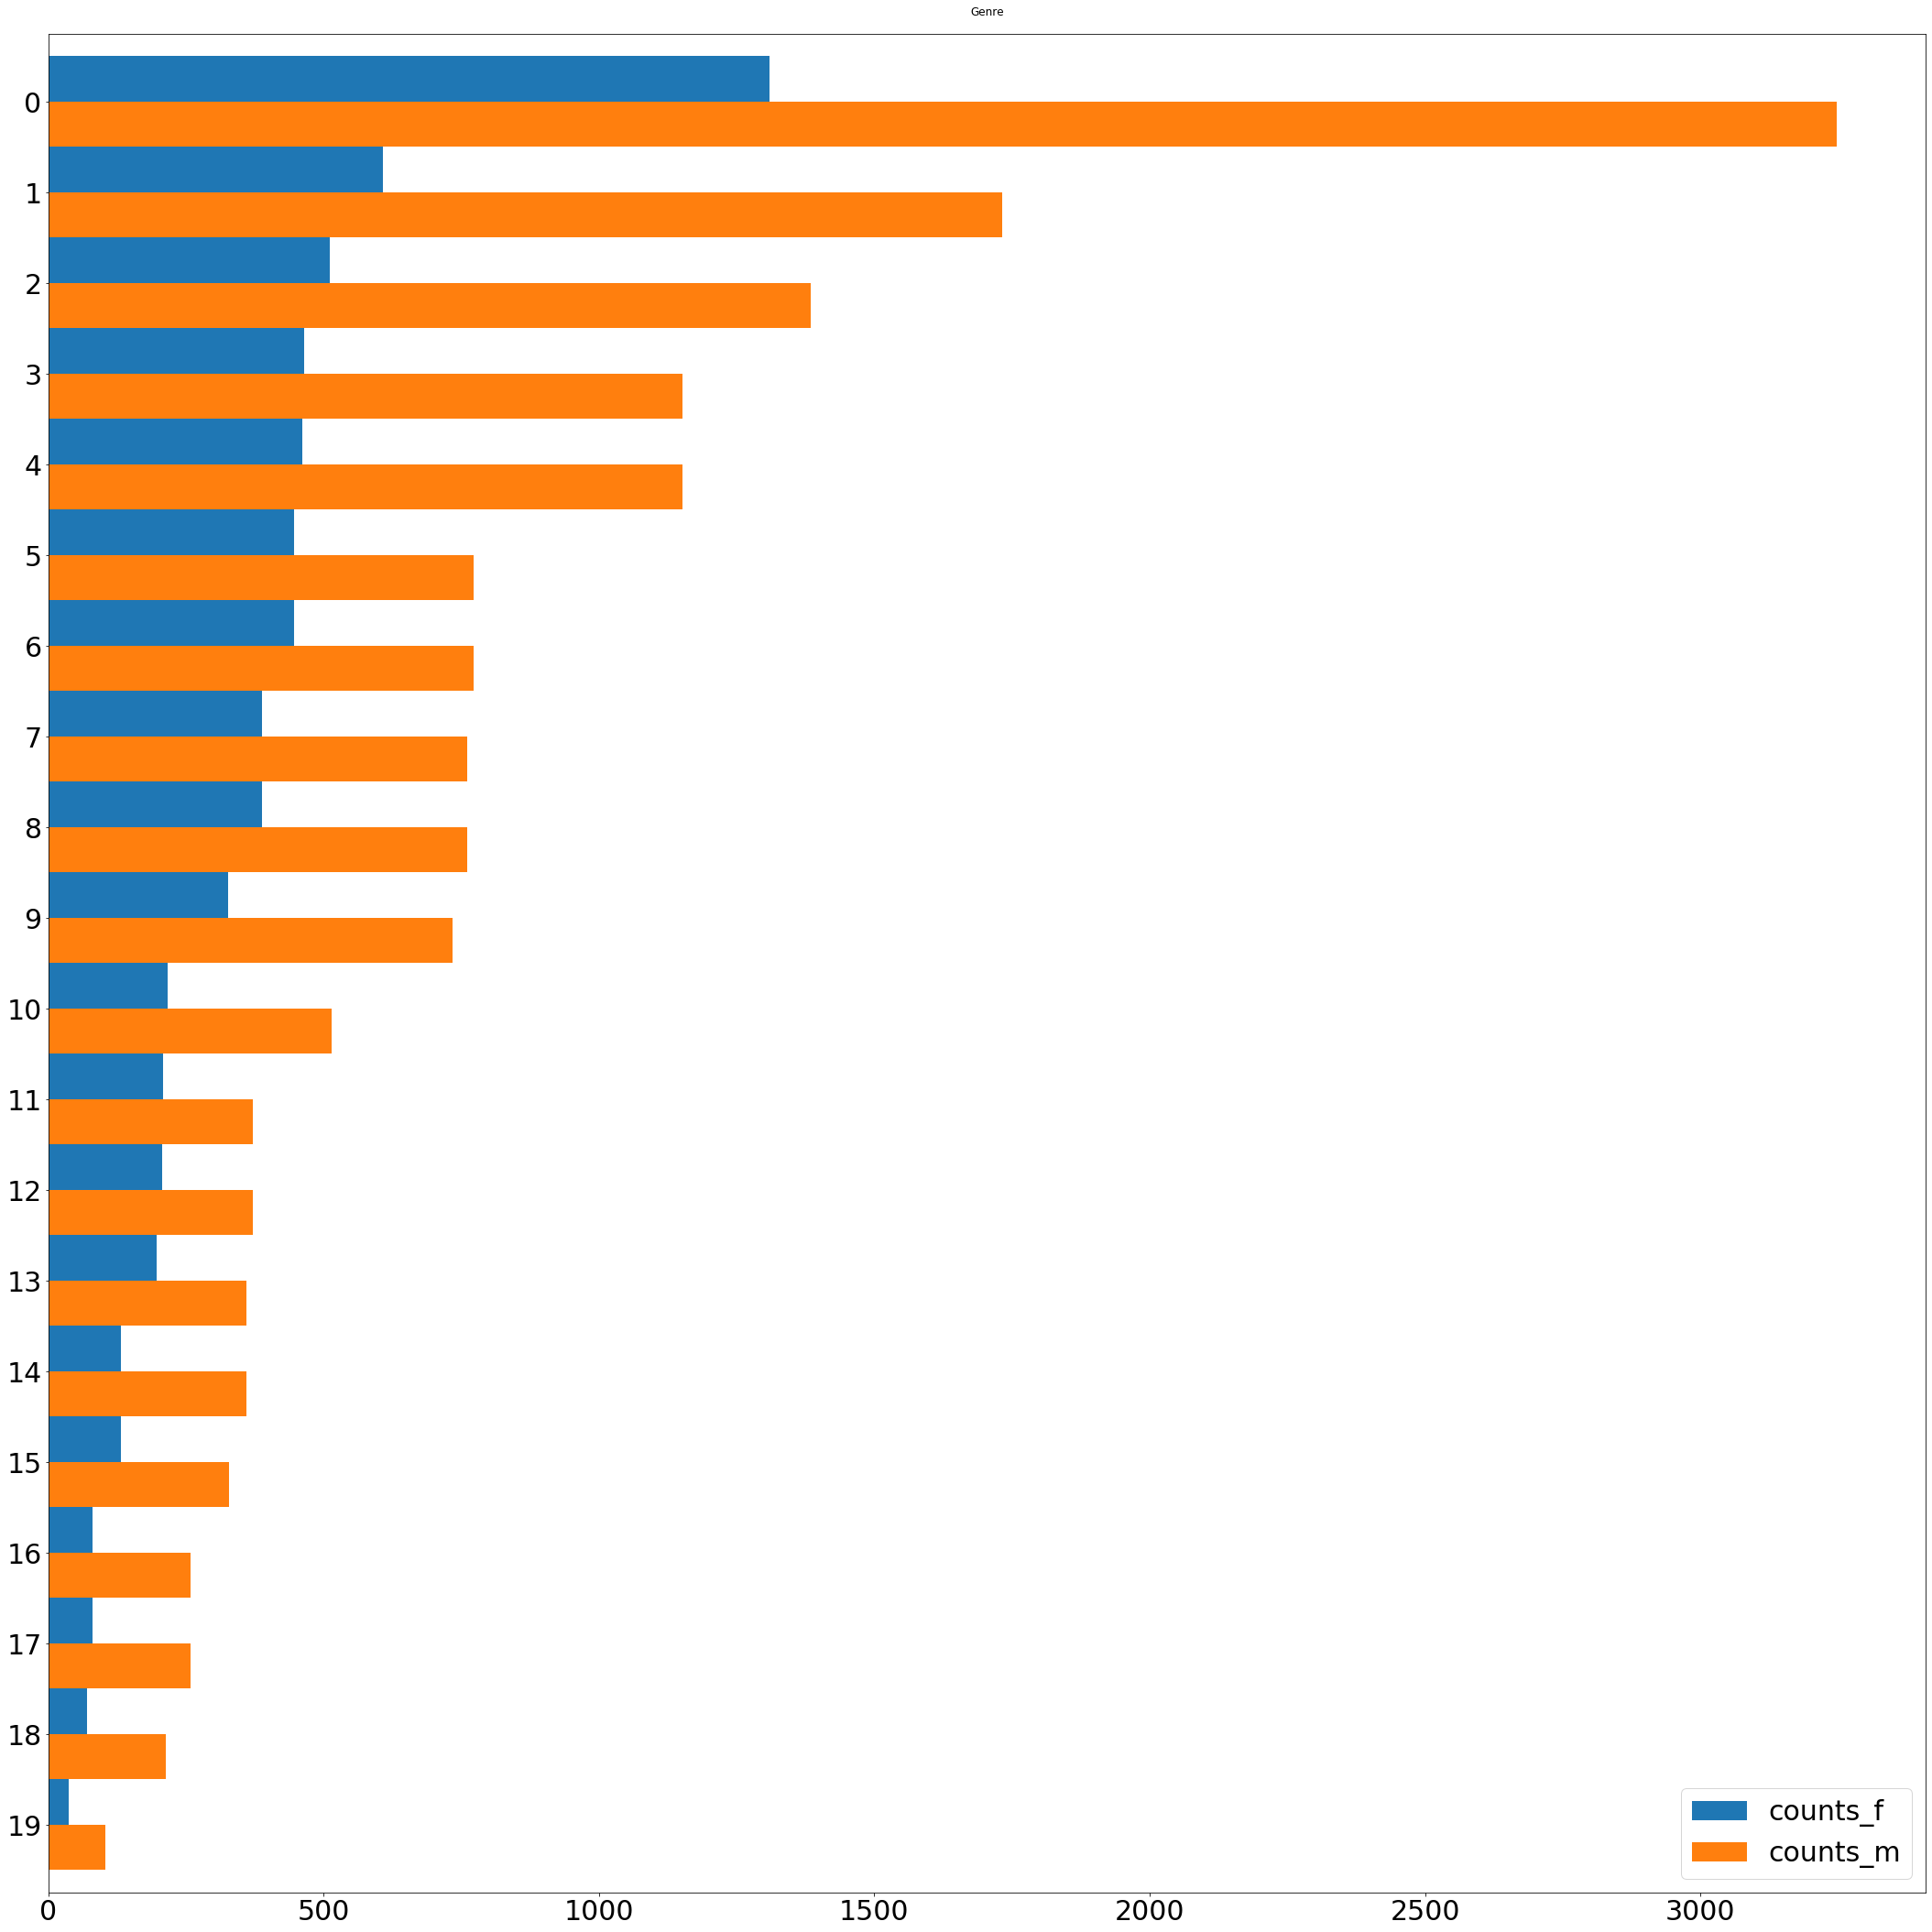

In [304]:
genre_all_counts.plot(kind = 'barh',figsize = (30,30),width =1)
plt.gca().invert_yaxis()

plt.title("Genre", fontsize = 12, pad = 20)
plt.tight_layout()
plt.savefig('output_genre.pdf')

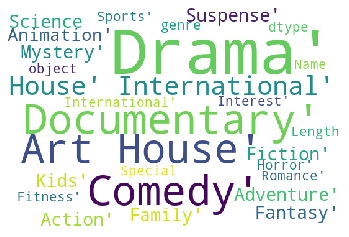

In [252]:
mpl.rcParams['font.size']=30               
mpl.rcParams['savefig.dpi']=3000              
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_font_size=100, 
                          max_words = 1000,
                          width=540,
                          height=360
                         ).generate(str(genre_f['genre']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1000)

In [223]:
genre_m = pd.DataFrame(genre_m)
genre_m = genre_m.rename(columns = {0:'genre'})

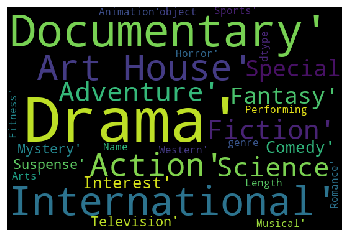

In [251]:
mpl.rcParams['font.size']=30               
mpl.rcParams['savefig.dpi']=3000              
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_font_size=100, 
                          max_words = 1000,
                          width=540,
                          height=360
                        ).generate(str(genre_m['genre']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word2.png", dpi=1000)

In [225]:
Genre = [genre_m, genre_f]
genre_all = pd.concat(Genre)

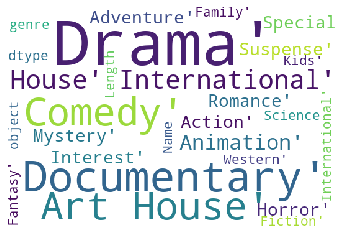

In [230]:
mpl.rcParams['font.size']=30               
mpl.rcParams['savefig.dpi']=3000              
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_font_size=100, 
                          max_words = 1000,
                          width=540,
                          height=360
                         ).generate(str(genre_all['genre']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word.png", dpi=500)